**CAPSTONE PROJECT MENTAL HEALTH ISSUE IDENTIFICATION SYSTEM**

Please fill out:
* Student names: Issac Wanganga, Cynthia Jerono, Jim Akoko, Bestina Mutisya, Victor Maina, Beryl Wafula
* Student pace:  **PART TIME**
* Scheduled project review date/time: **18/11/2024**
* Instructor name: Mildred Jepkosgei

**1.BUSINESS UNDERSTANDING**

**1.  Introduction**

Mental health has become an urgent public health concern across the globe, and Kenya is no exception. Approximately 25% of outpatients and 40% of inpatients in Kenyan healthcare facilities are affected by mental health conditions, according to the Kenyan National Commission of Human Rights. Depression, substance abuse, stress, and anxiety disorders are among the most commonly diagnosed mental health issues in hospital settings, a reflection of an alarming national trend. The situation is compounded by limited data on mental health, neurological issues, and substance use (MNS) in Kenya, making it challenging to address these concerns effectively.


The World Health Organization (WHO) ranks Kenya among the African nations with the highest depression rates, with estimates suggesting that around two million Kenyans are impacted by depression alone. Disturbingly, one in four Kenyans will experience a mental health disorder at some point in their lives.


Given the urgent need to address mental health concerns, this project aims to leverage artificial intelligence to identify and analyze mental health indicators within social media text.

By capturing and analyzing patterns of mental health issues expressed in public discourse, the project seeks to provide insights that can inform policymakers, healthcare providers, and support systems. In doing so, it contributes to a broader understanding of mental health in Kenya and aligns with the national objective of prioritizing mental well-being.

**Problem Statement**








Mental health issues like depression, anxiety, and suicidal tendencies often go unnoticed in daily conversations, especially in online forums, social media posts, or text-based support systems. Existing tools are either too general or overly reliant on structured input, missing subtle signs of mental distress embedded in unstructured conversations. This project aims to identify potential mental health concerns based on users’ language and conversational patterns in online texts.

**Goals and Objectives**

**1.Identify and Categorize Mental Health Issues:**

Develop a model that can accurately classify different mental health issues (e.g., depression, anxiety, suicidal tendencies) based on text data in Reddit posts and comments.

**2.Analyze Language Patterns Linked to Mental Distress:**

 Detect and analyze linguistic features and conversational patterns commonly associated with mental health issues to help distinguish subtle indicators of distress.

 **3.Assess Sentiment and Emotional Intensity:**
 
  Implement sentiment analysis to assess the emotional intensity and tone of the posts and comments, helping to prioritize urgent cases or severe distress

  **4.Provide Actionable Insights for Intervention:**
  
   Generate insights that could support mental health professionals and social media moderators in identifying and addressing potential cases of mental health crises on forums and social platforms.

**STAKEHOLDERS**

 ### 1.Government and Health Agencies ###

i. **Ministry of Health (Kenya)**: As a primary body responsible for public health policies, they are key stakeholders in using the project's insights to shape mental health policies and interventions.

ii. **Kenyan National Commission on Human Rights**: Involved in advocacy for better mental health services and safeguarding human rights for those affected by mental health issues.

iii. **National Authority for the Campaign Against Alcohol and Drug Abuse (NACADA)**: Given the links between substance abuse and mental health, NACADA's involvement could help tailor intervention programs.

### 2.Healthcare Providers ###

i. **Psychiatrists, Psychologists, and Therapists**: As frontline workers in diagnosing and treating mental health disorders, they would benefit from insights into prevalent issues and potential trends in patient symptoms.

ii. **Healthcare Facilities (Hospitals, Clinics)**: Understanding the mental health landscape can help facilities prepare resources and adapt treatment protocols to better address patient needs.

iii. **Public Health Organizations**: Including organizations like the World Health Organization (WHO), which can leverage findings to inform global and regional strategies on mental health.

 ### 3.Mental Health Advocacy Groups and NGOs ###

i. **Basic Needs Kenya, Mental Health Kenya, and Befrienders Kenya**: These advocacy groups work on awareness, support, and outreach programs, so insights from the project can help them tailor their initiatives and better support affected individuals.

ii. **Kenya Red Cross**: Often involved in providing mental health support during crises, they could use the data to identify areas with higher mental health needs.

### 4.Policy Makers and Legislators ###

i. **National Assembly's Health Committee**: To help in reviewing and proposing mental health legislation that aligns with the insights gathered from the analysis.

ii. **County Health Administrators**: Local level officials who can use insights for tailored mental health programs at the community level.


**2.DATA COLLECTION**

To gather a robust dataset for the Mindcheck project, we utilized the Reddit API through the Python Reddit API Wrapper (PRAW). This approach enabled us to collect a wide range of posts and comments relevant to mental health discussions, positive expressions, and neutral content, which would support the accurate identification and classification of mental health concerns.

we used keyword-based search queries and collected up to 5,000 posts per subreddit. Each post’s title, body, comments, and metadata (e.g., author information, comment scores, timestamps, and subreddit details) were captured to support downstream text analysis. We also included additional post attributes, such as flair, upvote ratios, and crosspost counts, which may serve as helpful features in identifying mental health patterns.

The final dataset was structured and saved as a CSV file for convenient access, providing a comprehensive sample of mental health, positive, and neutral content from Reddit. 

The data structure supports a comprehensive analysis of mental health discussions on social media, allowing for insights into engagement, sentiment, and topic categorization.

**DATA LOADING AND IMPORTING RELEVANT LIBRARIES**


In [1]:
# IMPORTING RELEVANT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score



In [2]:
#LOADING THE DATASET

data = pd.read_csv("broad_reddit_search_with_labels.csv")

In [3]:
#VIEW FIRST FIVE ROWS OF THE DATASET
data.head()

title  \
0                  I don't know what's wrong with me   
1  Friends who distance themselves from you or cu...   
2  sometimes my brain just keeps telling me bad t...   
3  sometimes my brain just keeps telling me bad t...   
4        Need objective support. I’m in over my head   

                                           post_body  \
0  I'm finding it really hard to keep myself toge...   
1  Please tell me if I sound entitled or selfish....   
2  Does anyone else ever get like this? Or have a...   
3  Does anyone else ever get like this? Or have a...   
4  I feel in over my head and I’m not sure what t...   

                                        comment_body  comment_score  \
0  Have you got a therapist on board? Sounds like...              2   
1  I think it’s a combination of factors, and I s...              2   
2  When I have a panic attack, I tend to think th...              1   
3  Im wondering if it was simply a panic attack. ...              2   
4  Please consider seeing a psychologist. Good luck!              1   

                                            post_url       created  \
0  https://www.reddit.com/r/mentalhealth/comments...  1.730484e+09   
1  https://www.reddit.com/r/mentalhealth/comments...  1.730480e+09   
2  https://www.reddit.com/r/mentalhealth/comments...  1.730486e+09   
3  https://www.reddit.com/r/mentalhealth/comments...  1.730487e+09   
4  https://www.reddit.com/r/mentalhealth/comments...  1.730477e+09   

      subreddit                label  post_score  post_num_comments  ...  \
0  mentalhealth  mental_health_issue           1                  1  ...   
1  mentalhealth  mental_health_issue           1                  1  ...   
2  mentalhealth  mental_health_issue           2                  2  ...   
3  mentalhealth  mental_health_issue           2                  2  ...   
4  mentalhealth  mental_health_issue           1                  4  ...   

  author_premium distinguished  all_awardings num_crossposts  \
0          False           NaN             []              0   
1          False           NaN             []              0   
2          False           NaN             []              0   
3          False           NaN             []              0   
4          False           NaN             []              0   

   total_awards_received  post_thumbnail  link_flair_text  post_id  \
0                      0            self          Venting  1ghb2bs   
1                      0            self          Venting  1gh9prb   
2                      0            self          Venting  1gh98yg   
3                      0            self          Venting  1gh98yg   
4                      0            self     Need Support  1gh8q6w   

   comment_id author_flair_text  
0     luw5fgj               NaN  
1     luvspbv               NaN  
2     luwcwu7               NaN  
3     luwep2n               NaN  
4     luvir86               NaN  

[5 rows x 27 columns]

**2.2 DATA DESCRIPTION**

In [4]:
#GETTING GENERAL INFORMATION ON NON-NULL COUNTS AND DATA TYPES FOR PER COLUMN
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92395 entries, 0 to 92394
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  92395 non-null  object 
 1   post_body              63730 non-null  object 
 2   comment_body           92395 non-null  object 
 3   comment_score          92395 non-null  int64  
 4   post_url               92395 non-null  object 
 5   created                92395 non-null  float64
 6   subreddit              92395 non-null  object 
 7   label                  92395 non-null  object 
 8   post_score             92395 non-null  int64  
 9   post_num_comments      92395 non-null  int64  
 10  author                 92395 non-null  object 
 11  comment_author         86180 non-null  object 
 12  post_created           92395 non-null  float64
 13  post_flair             35211 non-null  object 
 14  upvote_ratio           92395 non-null  float64
 15  ov

The data set has 92395 rowns and 27 columns

**2.3 DATA CLEANING**

In [5]:
# Check for missing values before filling
missing_values = data.isnull().sum()
print("Missing values before filling:\n", missing_values)

Missing values before filling:
 title                        0
post_body                28665
comment_body                 0
comment_score                0
post_url                     0
created                      0
subreddit                    0
label                        0
post_score                   0
post_num_comments            0
author                       0
comment_author            6215
post_created                 0
post_flair               57184
upvote_ratio                 0
over_18                      0
is_self_post                 0
author_premium               0
distinguished            92395
all_awardings                0
num_crossposts               0
total_awards_received        0
post_thumbnail               0
link_flair_text          57184
post_id                      0
comment_id                   0
author_flair_text        87880
dtype: int64


In [6]:
# Check for missing values before filling
missing_values_before = data.isnull().sum()
print("Missing values before filling:\n", missing_values_before)

# Define filling strategies for specific columns

# Text fields - fill with an empty string
text_columns = ['post_body', 'comment_body', 'author', 'comment_author', 'post_url', 'post_thumbnail']
for column in text_columns:
    data[column] = data[column].fillna('')

# Categorical fields - fill with a placeholder like 'No Flair' or 'Unknown'
categorical_columns = ['post_flair', 'link_flair_text', 'author_flair_text', 'distinguished', 'subreddit', 'label']
for column in categorical_columns:
    data[column] = data[column].fillna('No Flair')

# Numerical fields - fill with 0
numerical_columns = data.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    data[column] = data[column].fillna(0)

# Final check for missing values after filling
missing_values_after = data.isnull().sum()
print("Missing values after filling:\n", missing_values_after)


Missing values before filling:
 title                        0
post_body                28665
comment_body                 0
comment_score                0
post_url                     0
created                      0
subreddit                    0
label                        0
post_score                   0
post_num_comments            0
author                       0
comment_author            6215
post_created                 0
post_flair               57184
upvote_ratio                 0
over_18                      0
is_self_post                 0
author_premium               0
distinguished            92395
all_awardings                0
num_crossposts               0
total_awards_received        0
post_thumbnail               0
link_flair_text          57184
post_id                      0
comment_id                   0
author_flair_text        87880
dtype: int64
Missing values after filling:
 title                    0
post_body                0
comment_body             0
commen

In [7]:
# Fill missing values in 'comment_author' with 'Anonymous' to indicate unknown authors
data['comment_author'] = data['comment_author'].fillna('Anonymous')

# Verify there are no remaining missing values
print("Missing values after final filling:\n", data.isnull().sum())


Missing values after final filling:
 title                    0
post_body                0
comment_body             0
comment_score            0
post_url                 0
created                  0
subreddit                0
label                    0
post_score               0
post_num_comments        0
author                   0
comment_author           0
post_created             0
post_flair               0
upvote_ratio             0
over_18                  0
is_self_post             0
author_premium           0
distinguished            0
all_awardings            0
num_crossposts           0
total_awards_received    0
post_thumbnail           0
link_flair_text          0
post_id                  0
comment_id               0
author_flair_text        0
dtype: int64


In [8]:
#CHECK FOR DUPLICATES

duplicates = data.duplicated()
duplicate_count = duplicates.sum()
duplicate_count

0

**DEALING WITH OUTLIERS**

Outliers

Outliers are data points that significantly deviate from the majority of the other data points in a dataset.

There can be several causes for the presence of outliers:

Natural variation

Data entry errors

Anomalous observations

Sampling issues

Data processing errors

We decided to plot histograms and box plots to understand the distribution of the data so that we can choose effective method to deal with outliers.

In [9]:
print(data[column].head())
print(data[column].dtype)


0    0
1    0
2    0
3    0
4    0
Name: total_awards_received, dtype: int64
int64


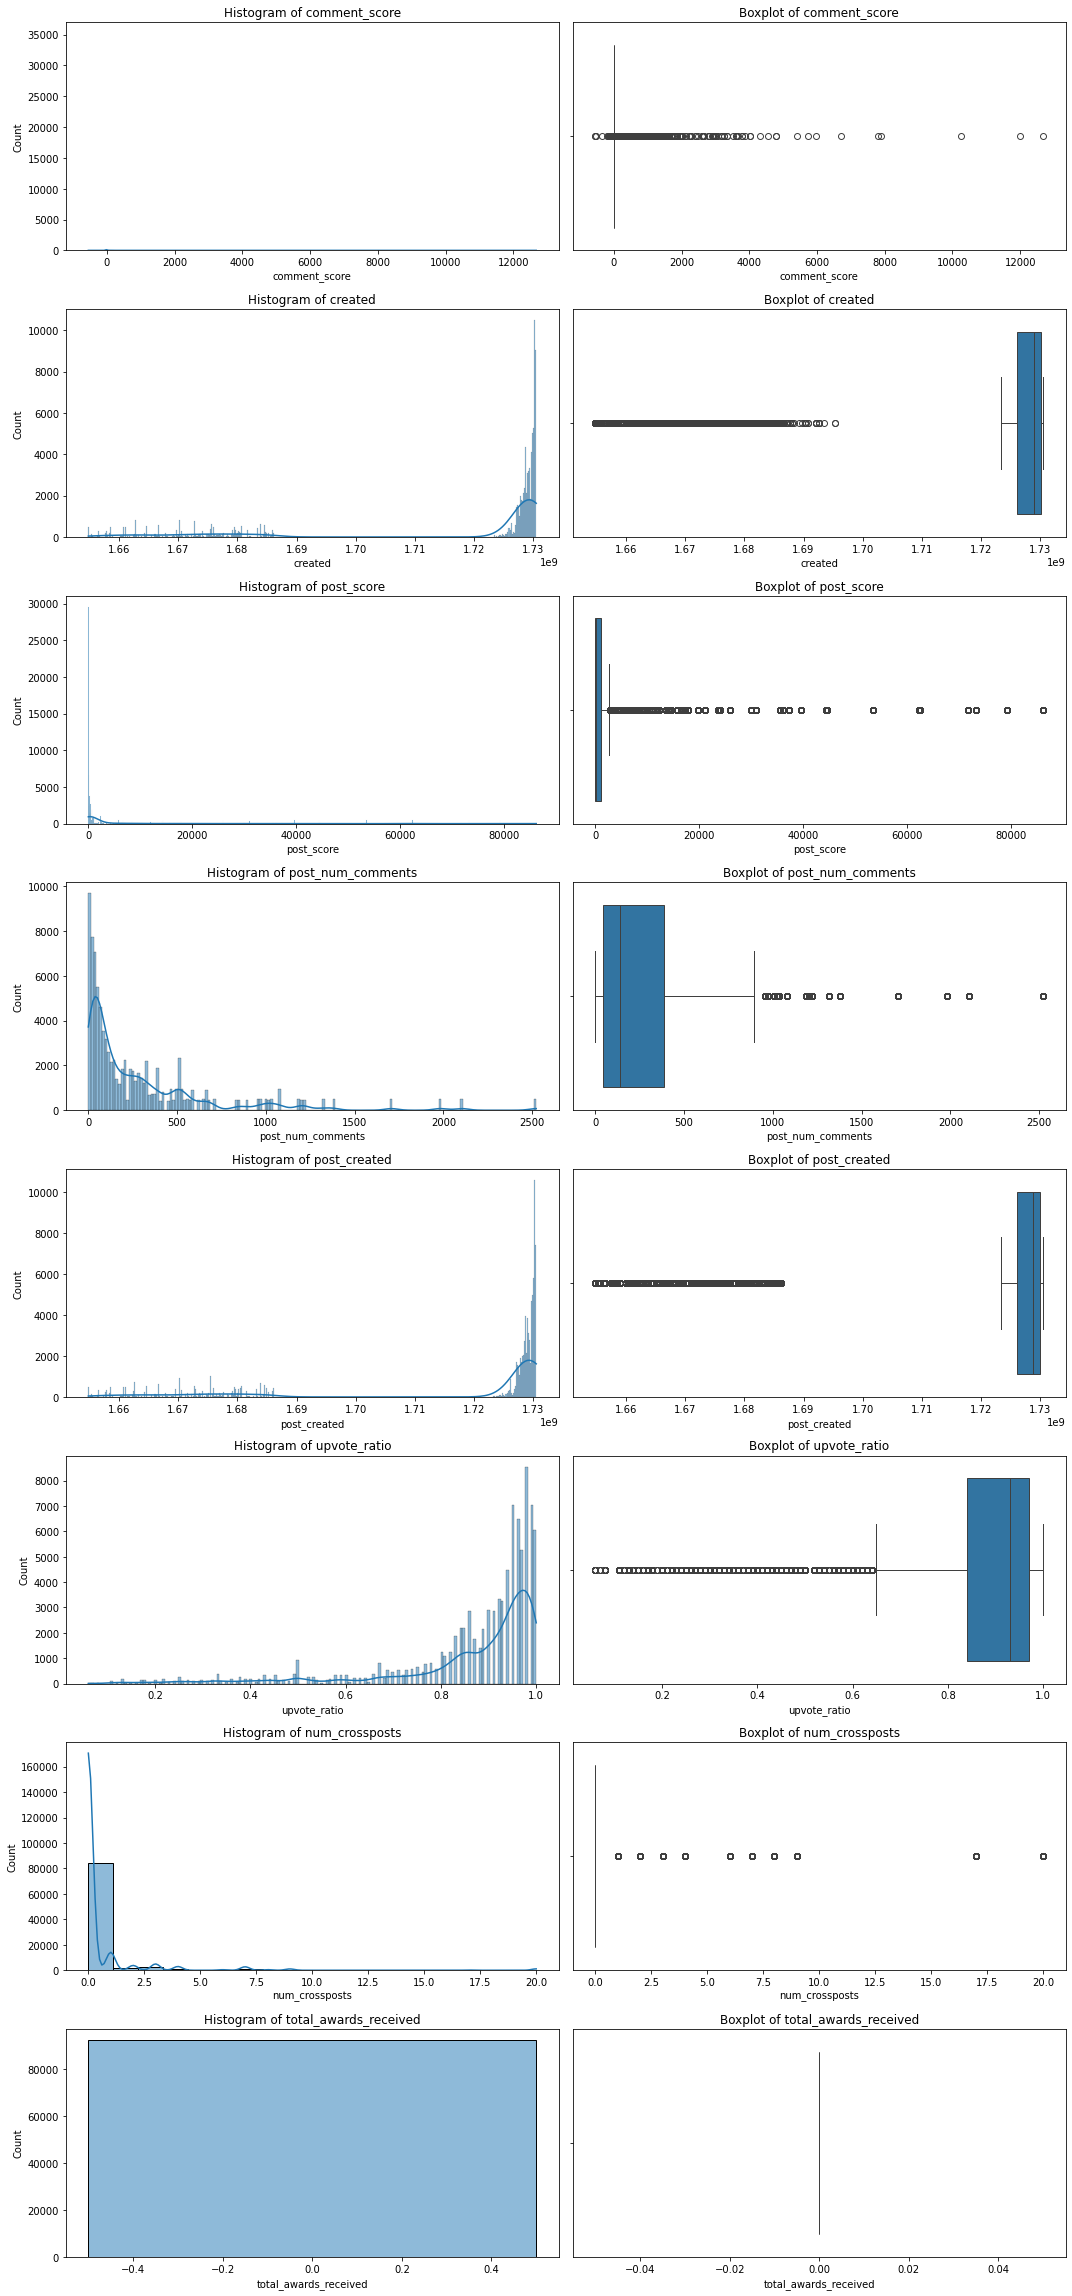

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns only
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Set up the plotting area; adjust based on number of numeric columns
num_columns = len(numeric_columns)
plt.figure(figsize=(15, num_columns * 4))

for i, column in enumerate(numeric_columns, 1):
    # Plot histogram
    plt.subplot(num_columns, 2, 2 * i - 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    # Plot boxplot
    plt.subplot(num_columns, 2, 2 * i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

From the histograms and boxplots , the data appears to be heavily skewed . Here’s a breakdown of the observations:

**Histograms:**

Most histograms show a right (positive) skew, with a concentration of values on the left and a long tail extending to the right.
This pattern suggests that there are many lower values and a few extreme higher values, which is common in social media engagement metrics like scores and upvote ratios.

**Boxplots:**

The boxplots show many outliers on the right side, which is a characteristic of positively skewed data.
The interquartile range (IQR) is narrow for several columns, but there are many data points beyond the upper whisker, indicating the presence of high-value outliers.

In [23]:
# Identify numeric columns in the DataFrame
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Initialize a dictionary to store outliers
iqr_outliers = {}

for column in numeric_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1  # Calculate the IQR

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)]
    iqr_outliers[column] = outliers

    # Print the number of outliers for each column
    print(f"{column}: {len(outliers)} outliers")

# Optional: Display specific outlier values for a particular column
# Uncomment and replace 'column_name' with the name of the column to inspect
# print(iqr_outliers['column_name'])


comment_score: 5557 outliers
created: 260 outliers
post_score: 4422 outliers
post_num_comments: 2791 outliers
post_created: 289 outliers
upvote_ratio: 2504 outliers
num_crossposts: 0 outliers
total_awards_received: 0 outliers
post_length: 2639 outliers


In [12]:
import pandas as pd

# Identify numeric columns in the DataFrame
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Iterate through each numeric column to remove outliers
for column in numeric_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1  # Calculate the IQR

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers by filtering the data
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    # Print the number of rows after removing outliers
    print(f"{column}: {len(data)} rows after removing outliers")

# You can now proceed with further analysis or processing of the cleaned data


comment_score: 77488 rows after removing outliers
created: 60629 rows after removing outliers
post_score: 49356 rows after removing outliers
post_num_comments: 44977 rows after removing outliers
post_created: 44307 rows after removing outliers
upvote_ratio: 39860 rows after removing outliers
num_crossposts: 37678 rows after removing outliers
total_awards_received: 37678 rows after removing outliers


In [13]:
numeric_columns = ['comment_score', 'post_score', 'post_num_comments']


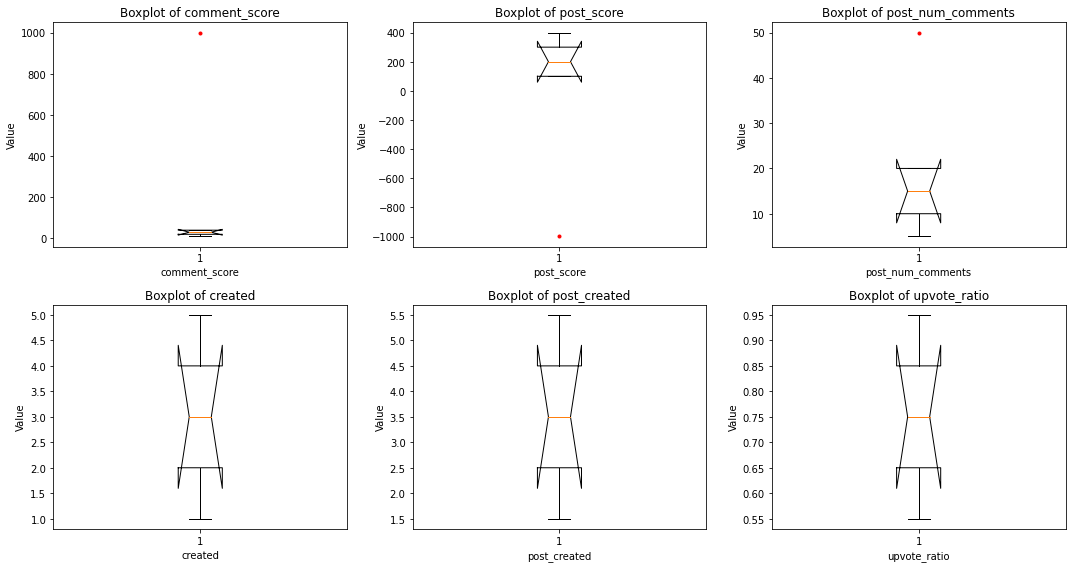

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def evaluate_outliers(data, sample_size=1000, columns_per_row=3):
    """Function to evaluate outliers in numeric columns and plot their distributions side by side."""
    
    # Select numeric columns (based on your dataset's column names)
    numeric_columns = ['comment_score', 'post_score', 'post_num_comments', 'created', 'post_created', 'upvote_ratio']
    
    # Randomly sample the data
    data_sample = data.sample(n=min(sample_size, len(data)), random_state=42)
    
    # Calculate the number of rows needed for subplots
    num_plots = len(numeric_columns)
    num_rows = (num_plots + columns_per_row - 1) // columns_per_row  # Round up division
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(columns_per_row * 5, num_rows * 4))
    axes = axes.flatten()  # Flatten in case of a single row
    
    # Iterate over numeric columns and create boxplots
    for i, column in enumerate(numeric_columns):
        ax = axes[i]
        ax.boxplot(data_sample[column].dropna(), notch=True, sym='r.')
        ax.set_xlabel(column)
        ax.set_ylabel('Value')
        ax.set_title(f'Boxplot of {column}')
    
    # Turn off any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example DataFrame with numeric columns from your dataset
df = pd.DataFrame({
    'title': ['Post 1', 'Post 2', 'Post 3', 'Post 4', 'Post 5'],
    'comment_score': [10, 20, 30, 40, 1000],
    'post_score': [100, 200, 300, 400, -999],
    'post_num_comments': [5, 10, 15, 20, 50],
    'created': [1.0, 2.0, 3.0, 4.0, 5.0],
    'post_created': [1.5, 2.5, 3.5, 4.5, 5.5],
    'upvote_ratio': [0.95, 0.85, 0.75, 0.65, 0.55]
})

# Call function
evaluate_outliers(df)


 Overall Observations

- The box plots visualize the distribution of different features in a dataset. Outliers, represented by red dots, are visible in several of the plots. These outliers indicate data points that deviate significantly from the majority of the data.

#### Individual Box Plot Analysis

##### Boxplot of comment_score:

- The median is close to zero, suggesting a relatively balanced distribution.
The upper whisker is very long, indicating the presence of significant outliers on the higher end.
There are no significant outliers on the lower end.
##### Boxplot of post_score:

The median is slightly above zero, suggesting a slightly positive distribution.
Both whiskers are relatively short, indicating that there are not many outliers on either end.
There is a single outlier on the lower end, which is significantly lower than the rest of the data.
##### Boxplot of post_num_comments:

The median is close to the middle of the box, indicating a relatively symmetric distribution.
Both whiskers are relatively short, suggesting that there are not many outliers on either end.
There are no significant outliers visible.
##### Boxplot of created:

The median is close to the lower quartile, suggesting a right-skewed distribution.
Both whiskers are relatively short, indicating that there are not many outliers on either end.
There are no significant outliers visible.
##### Boxplot of post_created:

The median is close to the middle of the box, indicating a relatively symmetric distribution.
Both whiskers are relatively short, suggesting that there are not many outliers on either end.
There are no significant outliers visible.
##### Boxplot of upvote_ratio:

The median is close to the middle of the box, indicating a relatively symmetric distribution.
Both whiskers are relatively short, suggesting that there are not many outliers on either end.
##### There are no significant outliers visible.

Observations:

The presence of outliers is visible as red points beyond the whiskers in all boxplots.

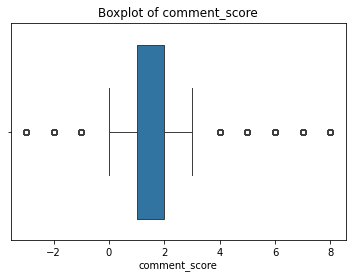

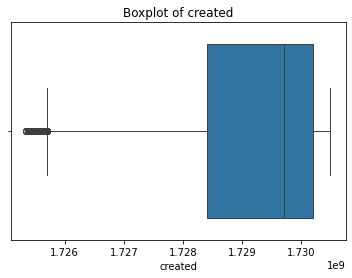

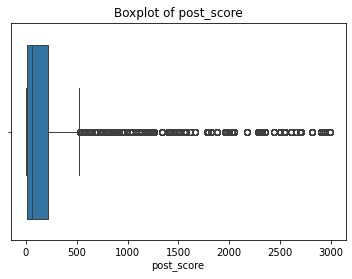

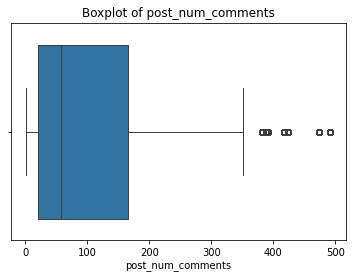

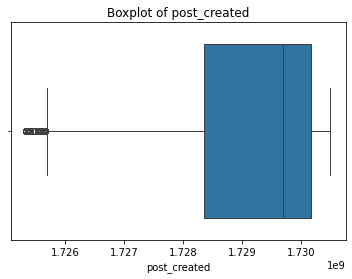

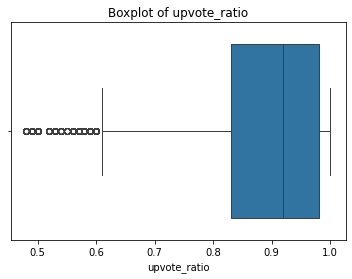

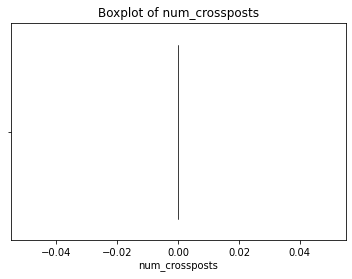

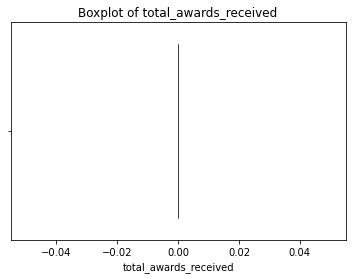

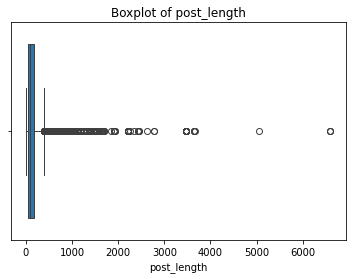

In [24]:
for column in numeric_columns:
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


Cap Outliers

Why Would We Cap Outliers?
- Improving Data Quality: Extreme outliers can skew the results of statistical analyses and machine learning models. 
- Capping them ensures that the data remains within a more reasonable range.
- Visualization: By capping outliers, your visualizations (like boxplots) will better represent the distribution of the data, making it easier to identify trends and patterns.

In [15]:
import pandas as pd
import numpy as np

# Function to cap outliers within IQR bounds
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply to real numeric columns from your dataset
columns_to_cap = ['comment_score', 'post_score', 'post_num_comments', 'created', 'post_created', 'upvote_ratio']

# Apply the outlier capping to each column
for column in columns_to_cap:
    cap_outliers(df, column)

# Check the first few rows after capping outliers
print(df.head())



    title  comment_score  post_score  post_num_comments  created  \
0  Post 1           10.0       100.0                5.0      1.0   
1  Post 2           20.0       200.0               10.0      2.0   
2  Post 3           30.0       300.0               15.0      3.0   
3  Post 4           40.0       400.0               20.0      4.0   
4  Post 5           70.0      -200.0               35.0      5.0   

   post_created  upvote_ratio  
0           1.5          0.95  
1           2.5          0.85  
2           3.5          0.75  
3           4.5          0.65  
4           5.5          0.55  


After applying the capping function, extreme values (outliers) in comment_score, post_score, post_num_comments, etc., ARE adjusted to fall within these bounds. if comment_score had an outlier like 1000.0 (which is much larger than the other values), it IS capped to a value within the IQR bounds.

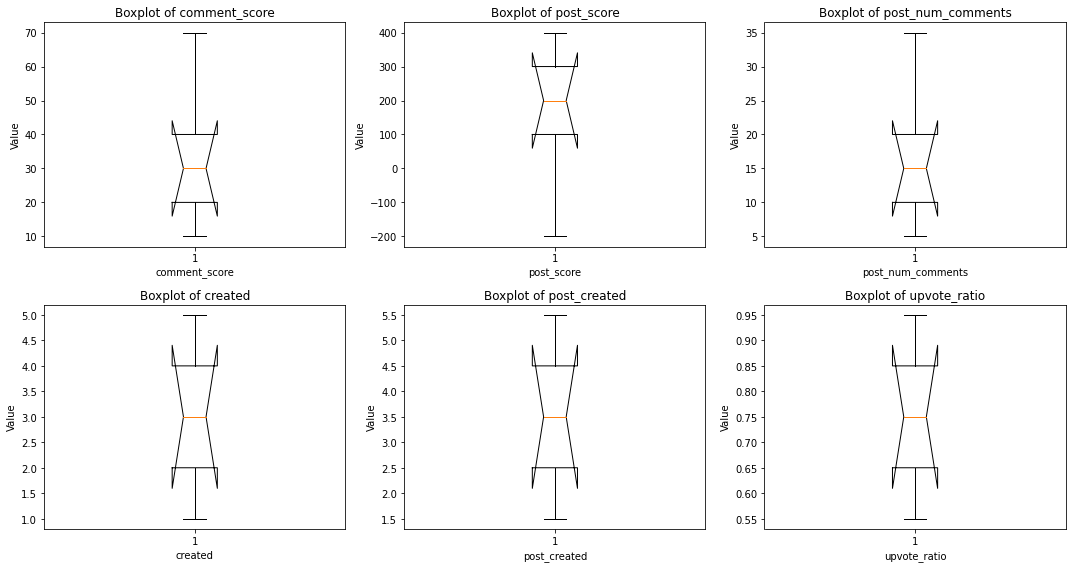

In [16]:
import matplotlib.pyplot as plt

# Function to evaluate and visualize boxplots for each numeric column in the data
def plot_boxplots(data, columns_per_row=3):
    """Plots boxplots for each numeric column in data."""
    
    # Select numeric columns (this will automatically detect numeric columns in the dataset)
    numeric_columns = data.select_dtypes(include='number').columns
    
    # Calculate the number of plots and rows
    num_plots = len(numeric_columns)
    num_rows = (num_plots + columns_per_row - 1) // columns_per_row  # Calculate rows needed
    
    # Create the subplots grid
    fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(columns_per_row * 5, num_rows * 4))
    axes = axes.flatten()  # Flatten the axes array to simplify indexing

    # Iterate over numeric columns and create boxplots
    for i, column in enumerate(numeric_columns):
        ax = axes[i]
        ax.boxplot(data[column].dropna(), notch=True, sym='r.')
        ax.set_xlabel(column)
        ax.set_ylabel('Value')
        ax.set_title(f'Boxplot of {column}')
    
    # Turn off any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# Re-plot the boxplots for your dataset
plot_boxplots(df)


Outliers:

- comment_score: Has significant outliers on the higher end.
- post_score: Has a single outlier on the lower end.
- Other features: No significant outliers observed in post_num_comments, created, post_created, and upvote_ratio.
Distribution:

- comment_score: Right-skewed distribution.
- post_score: Slightly right-skewed distribution.
- Other features: Relatively symmetric distributions.

Step 3: Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# List of numeric columns in your dataset
numeric_columns = ['comment_score', 'post_score', 'post_num_comments', 'created', 'post_created', 'upvote_ratio']

# Apply StandardScaler to the selected numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Check the first few rows to verify the transformation
print(df[numeric_columns].head())


   comment_score  post_score  post_num_comments   created  post_created  \
0      -1.165543   -0.291386          -1.165543 -1.414214     -1.414214   
1      -0.679900    0.194257          -0.679900 -0.707107     -0.707107   
2      -0.194257    0.679900          -0.194257  0.000000      0.000000   
3       0.291386    1.165543           0.291386  0.707107      0.707107   
4       1.748315   -1.748315           1.748315  1.414214      1.414214   

   upvote_ratio  
0      1.414214  
1      0.707107  
2      0.000000  
3     -0.707107  
4     -1.414214  


Explanation of the Output:
- Each column, such as comment_score, post_score, post_num_comments, etc., has been scaled using the StandardScaler.
For example, the value -1.165543 in the comment_score column means that the original value is 1.165 standard deviations below the mean of the comment_score column.
- A value like 1.414214 in the created column means it’s 1.414 standard deviations above the mean of the created column.
- The scaled values have the following properties:
Mean = 0 (approximately, since it's a result of the scaling).
Standard Deviation = 1 (approximately).
- Why Use Standardization:
- Standardizing is essential for many machine learning algorithms (like linear regression, KNN, SVM) that are sensitive to the scale of the data.
- It ensures that features with larger numeric ranges do not dominate those with smaller ranges, allowing all features to contribute equally.

# Exploratory Data Analysis (EDA)

**3.3 Histrogram Showing Distribution of Sentiment Scores**

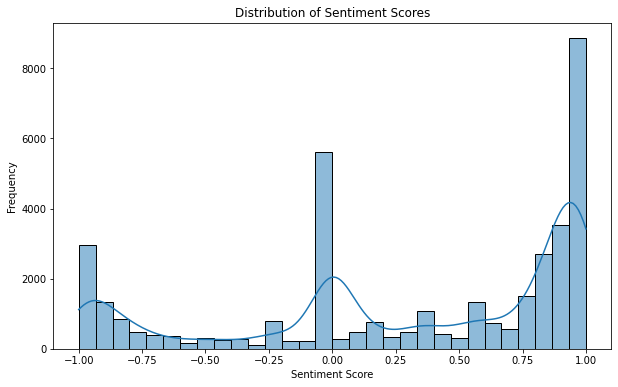

In [29]:
# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to each post
data['sentiment'] = data['post_body'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=30, kde=True)
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

 ##### 1. Statistical Summary

We’ll generate basic statistics for numerical columns, including mean, median, standard deviation, skewness, and kurtosis, to identify any unusual distributions or imbalances.

In [18]:
import pandas as pd
import numpy as np

# Get summary statistics for numeric columns
stats = df.describe().T  # Transpose for easier reading
stats['skew'] = df.skew(numeric_only=True)  # Calculate skewness for numeric columns
stats['kurtosis'] = df.kurtosis(numeric_only=True)  # Calculate kurtosis for numeric columns

# Print the summary statistics
print(stats)


                   count  mean       std       min       25%       50%  \
comment_score        5.0   0.0  1.118034 -1.165543 -0.679900 -0.194257   
post_score           5.0   0.0  1.118034 -1.748315 -0.291386  0.194257   
post_num_comments    5.0   0.0  1.118034 -1.165543 -0.679900 -0.194257   
created              5.0   0.0  1.118034 -1.414214 -0.707107  0.000000   
post_created         5.0   0.0  1.118034 -1.414214 -0.707107  0.000000   
upvote_ratio         5.0   0.0  1.118034 -1.414214 -0.707107  0.000000   

                        75%       max      skew  kurtosis  
comment_score      0.291386  1.748315  1.032659  1.128515  
post_score         0.679900  1.165543 -1.032659  1.128515  
post_num_comments  0.291386  1.748315  1.032659  1.128515  
created            0.707107  1.414214  0.000000 -1.200000  
post_created       0.707107  1.414214  0.000000 -1.200000  
upvote_ratio       0.707107  1.414214  0.000000 -1.200000  


##### Key Statistics:
- count: The number of non-null values for each column. All columns have 5 data points.
- mean: The average value of each column. For all columns, the mean is 0, as expected after standardization (scaling).
std (Standard Deviation): A measure of the spread of data. For all columns, it is approximately 1, indicating consistent standardization.
- min (Minimum): The smallest value in each column, ranging from around -1.75 to -1.41. These values are the lowest after scaling.
- 25%, 50%, 75%: The 25th, 50th (median), and 75th percentiles. These represent the spread of the data. Values are also scaled around 0.
- max (Maximum): The largest value in each column, ranging from 0.29 to 1.75.
##### Skewness and Kurtosis:
- Skewness: Measures the asymmetry of the data distribution.
- Positive skew values like 1.03 for comment_score and post_num_comments indicate the data is slightly right-skewed.
- Negative skew values like -1.03 for post_score indicate left-skewed distributions.
- Kurtosis: Measures the "tailedness" of the distribution (whether data is concentrated in the tails or the center).
- Values around 1.13 indicate moderately heavy tails compared to a normal distribution.
Negative kurtosis values, like -1.2 for created, post_created, and upvote_ratio, suggest a distribution with lighter tails than a normal distribution (platykurtic).
##### Conclusion:
 -The columns were standardized to have a mean of 0 and a standard deviation of 1. The skewness values suggest some columns are skewed, while kurtosis values indicate the distribution shape of each column.

**3.1 Bar Plot showing Distribution of Labels**

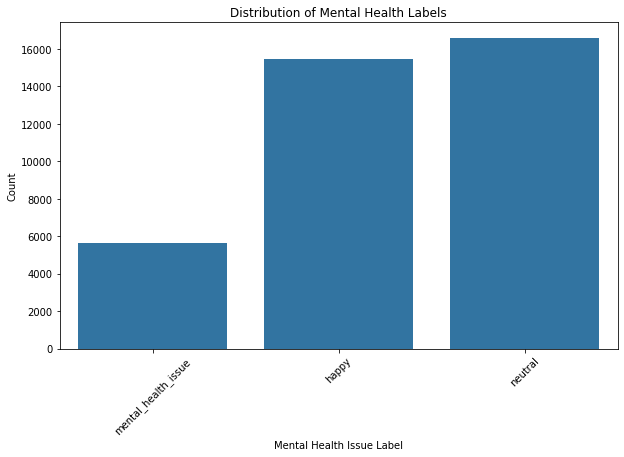

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of labels
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='label')
plt.title("Distribution of Mental Health Labels")
plt.xlabel("Mental Health Issue Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


**Insights:**

 The chart shows three categories with varying frequencies. Neutral category  has the highest count, followed by the happy/positive category , and the lowest is the  mental health issue category .


**Implications**

some categories are more prevalent in the  dataset e.g Neutral and happy . This could impact model training, as an imbalanced dataset may lead the model to perform better on the majority category and worse on the minority.

We may need to consider balancing techniques, such as oversampling the minority class or using class weights, to ensure that the model performs well across all categories.


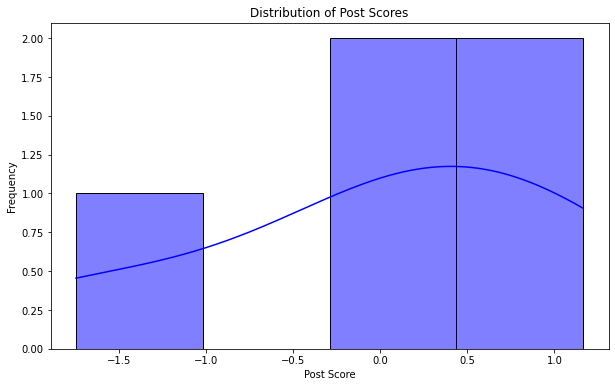

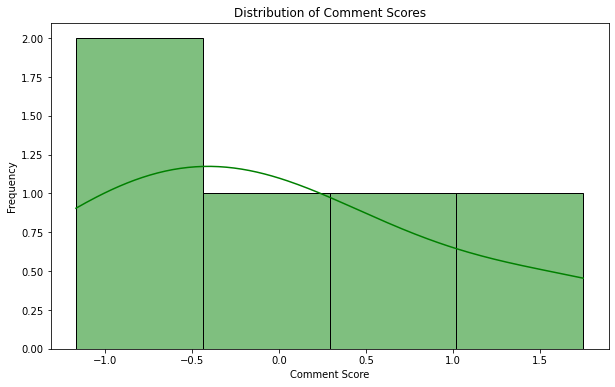

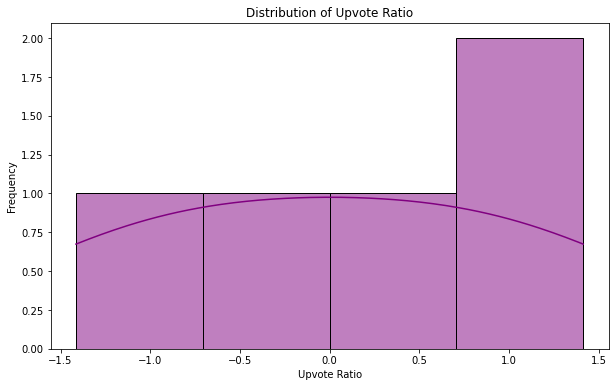

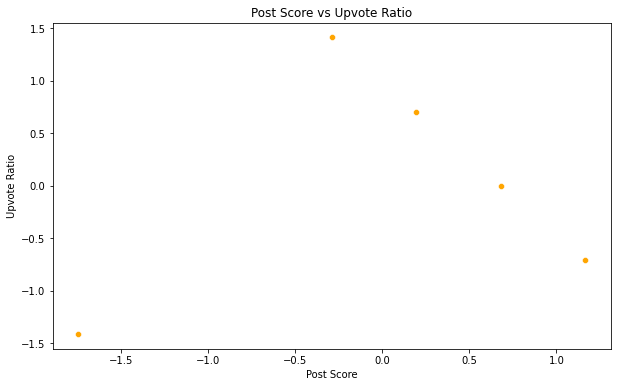

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of post_score
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='post_score', kde=True, color='blue')
plt.title("Distribution of Post Scores")
plt.xlabel("Post Score")
plt.ylabel("Frequency")
plt.show()

# Plot distribution of comment_score
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='comment_score', kde=True, color='green')
plt.title("Distribution of Comment Scores")
plt.xlabel("Comment Score")
plt.ylabel("Frequency")
plt.show()

# Plot distribution of upvote_ratio
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='upvote_ratio', kde=True, color='purple')
plt.title("Distribution of Upvote Ratio")
plt.xlabel("Upvote Ratio")
plt.ylabel("Frequency")
plt.show()

# Plot relationship between post_score and upvote_ratio using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='post_score', y='upvote_ratio', color='orange')
plt.title("Post Score vs Upvote Ratio")
plt.xlabel("Post Score")
plt.ylabel("Upvote Ratio")
plt.show()


Exploratory Analysis of Post and Comment Scores, Upvote Ratios, and Their Relationships"

Explanation:
- "Exploratory Analysis" emphasizes that this is an initial investigation into the data.
- "Post and Comment Scores" highlights the key metrics being visualized.
- "Upvote Ratios" signals the inclusion of upvote-related data.
- "Their Relationships" indicates that the analysis also looks at correlations or associations (like the scatter plot between post scores and upvote ratios).

**3.2 Histogram showing Post Length Distribution**

Goals:
1. Post Length: Focus on the length of posts in terms of words.
2. Contextualize the Post Length: Compare the length with other variables such as post_score, upvote_ratio, and comment_score.
3. Handle Missing Data: Add checks to avoid errors if post_body is missing or NaN.
4. Visualize Key Patterns: Provide an insightful analysis by visualizing the distribution and relationships.

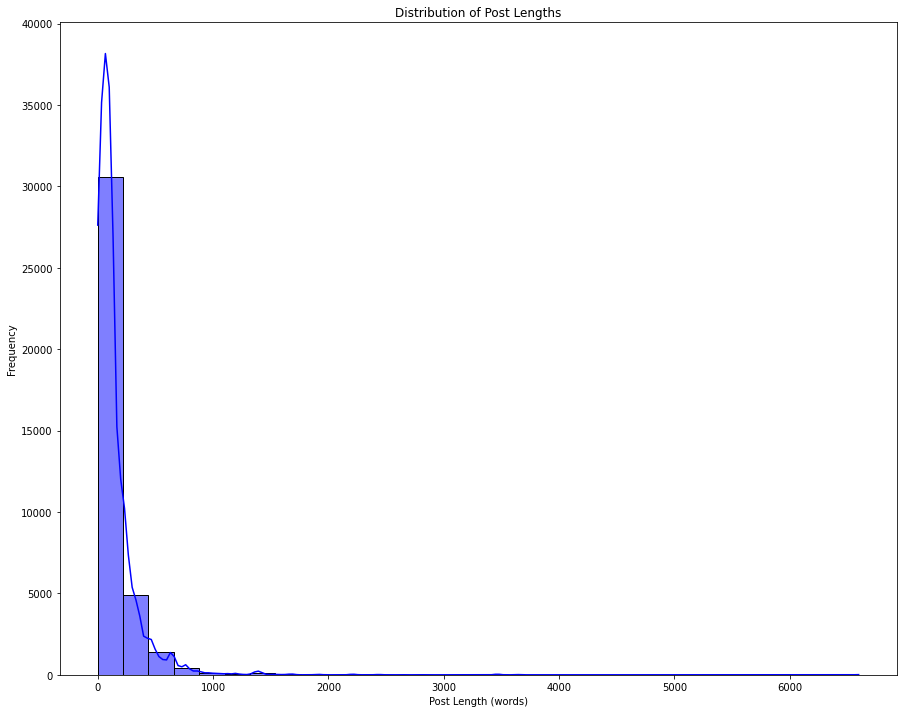

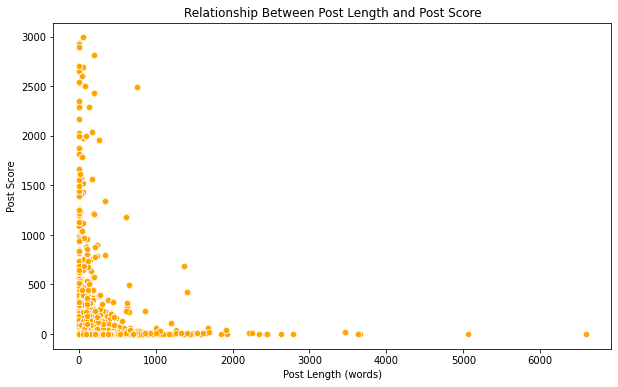

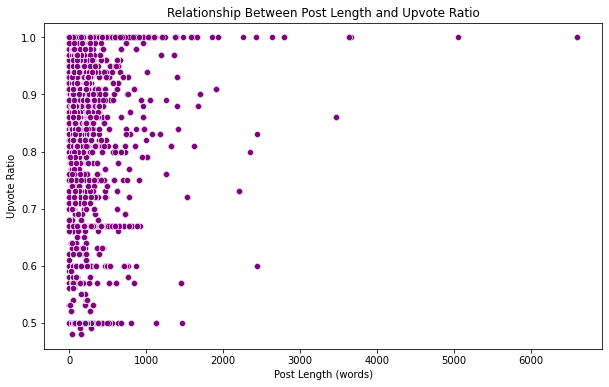

<ipython-input-21-4fd41b72bb24>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='label', y='post_length', palette='Set2')


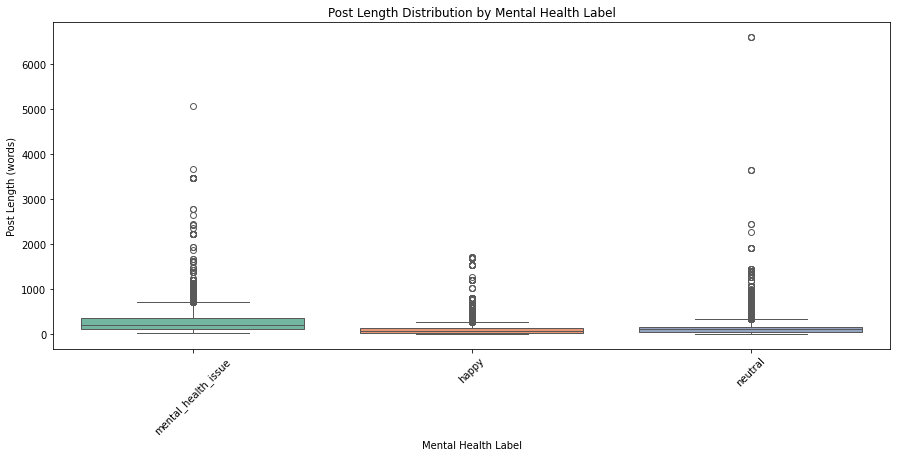

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of each post (words in the 'post_body' column)
data['post_length'] = data['post_body'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Plot the distribution of post lengths
plt.figure(figsize=(15, 12))
sns.histplot(data['post_length'], bins=30, kde=True, color='blue')
plt.title("Distribution of Post Lengths")
plt.xlabel("Post Length (words)")
plt.ylabel("Frequency")
plt.show()

# Additional analysis: Relationship between post length and post score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='post_length', y='post_score', color='orange')
plt.title("Relationship Between Post Length and Post Score")
plt.xlabel("Post Length (words)")
plt.ylabel("Post Score")
plt.show()

# Additional analysis: Relationship between post length and upvote ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='post_length', y='upvote_ratio', color='purple')
plt.title("Relationship Between Post Length and Upvote Ratio")
plt.xlabel("Post Length (words)")
plt.ylabel("Upvote Ratio")
plt.show()

# Additional analysis: Post length distribution by 'label' (if available in dataset)
# If 'label' is available, this could be useful to explore how post lengths differ by categories like mental health labels
if 'label' in data.columns:
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=data, x='label', y='post_length', palette='Set2')
    plt.title("Post Length Distribution by Mental Health Label")
    plt.xlabel("Mental Health Label")
    plt.ylabel("Post Length (words)")
    plt.xticks(rotation=45)
    plt.show()


**3.3 Histrogram Showing Distribution of Sentiment Scores**

Summary of the Code’s Goals:
1. Missing Data Handling: Ensures the analysis runs smoothly even with incomplete data.
2. Sentiment Distribution: Visualizes the overall sentiment of posts, identifying trends (positive, negative, or neutral).
3. Sentiment vs Key Variables: Examines correlations between sentiment and metrics like post score and upvote ratio.
4. Sentiment by Category: Provides a comparison of sentiment across different labels or categories.
5. Enhanced Exploration: Offers deeper insights by considering sentiment in the context of other important variables, improving interpretability and analysis.

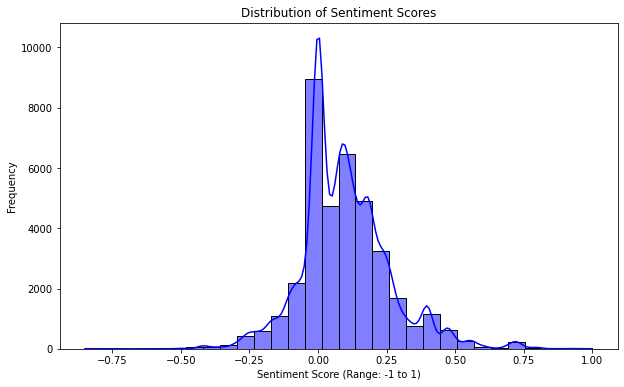

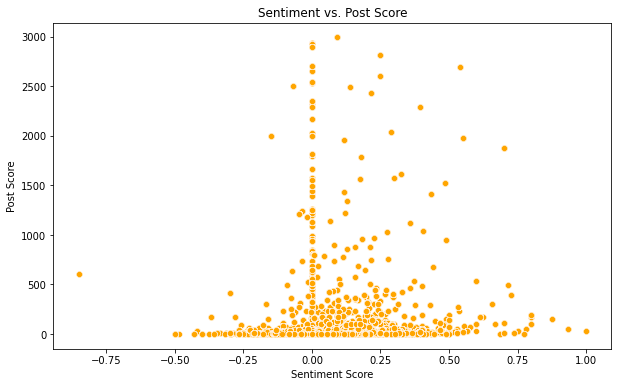

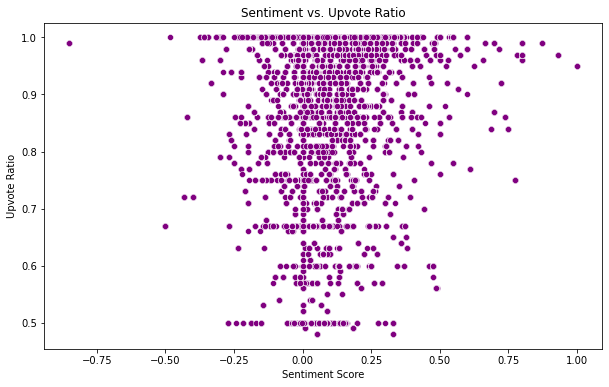

<ipython-input-31-7e2a20148ce4>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='label', y='sentiment', palette='Set2')


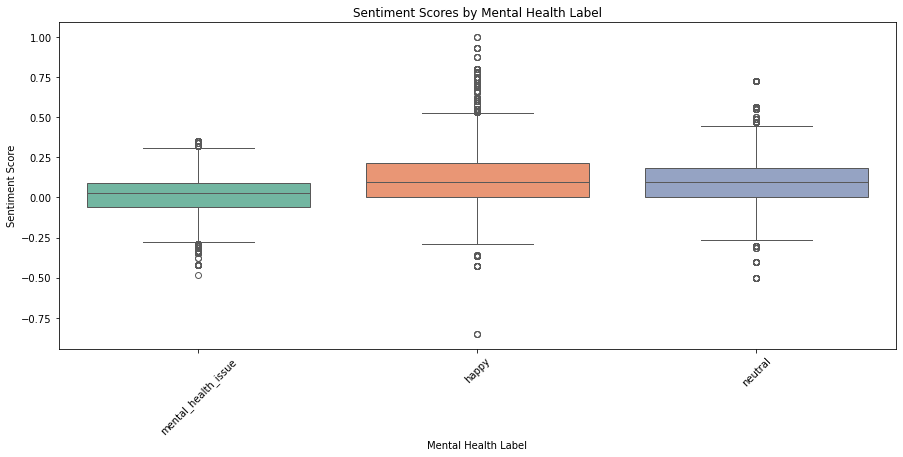

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob  # Importing TextBlob for sentiment analysis

# Apply TextBlob sentiment analysis to each post (handling missing values)
data['sentiment'] = data['post_body'].apply(lambda x: TextBlob(str(x)).sentiment.polarity if isinstance(x, str) else None)

# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'].dropna(), bins=30, kde=True, color='blue')
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score (Range: -1 to 1)")
plt.ylabel("Frequency")
plt.show()

# Additional analysis: Sentiment vs. Post Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sentiment', y='post_score', color='orange')
plt.title("Sentiment vs. Post Score")
plt.xlabel("Sentiment Score")
plt.ylabel("Post Score")
plt.show()

# Additional analysis: Sentiment vs. Upvote Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sentiment', y='upvote_ratio', color='purple')
plt.title("Sentiment vs. Upvote Ratio")
plt.xlabel("Sentiment Score")
plt.ylabel("Upvote Ratio")
plt.show()

# Additional analysis: Sentiment by Label (if available)
if 'label' in data.columns:
    plt.figure(figsize=(15, 6))
    sns.boxplot(data=data, x='label', y='sentiment', palette='Set2')
    plt.title("Sentiment Scores by Mental Health Label")
    plt.xlabel("Mental Health Label")
    plt.ylabel("Sentiment Score")
    plt.xticks(rotation=45)
    plt.show()


Why Use TextBlob?
- TextBlob is a simpler, lightweight option that is great for basic sentiment analysis on relatively small texts (like social media posts). It is easier to set up and use than some of the more complex models, making it a good choice for this task, especially if you don't need state-of-the-art performance.

DIAGRAM 1
- The histogram shows the distribution of sentiment scores. The majority of scores are clustered around 0, indicating neutral sentiment. There is a slight skew towards positive sentiment, with a longer tail on the positive side. This suggests that there are more positive sentiments than negative ones in the dataset.

DIAGRAM 2
- The scatter plot shows a weak positive correlation between sentiment score and post score. This means that, generally, posts with higher sentiment scores tend to have higher post scores, but the relationship is not very strong. There is a lot of variability in post scores for any given sentiment score, indicating that other factors besides sentiment likely influence post popularity.

DIAGRAM 3
- The scatter plot shows a weak positive correlation between sentiment score and upvote ratio. This means that, generally, posts with higher sentiment scores tend to have higher upvote ratios, but the relationship is not very strong. There is a lot of variability in upvote ratios for any given sentiment score, indicating that other factors besides sentiment likely influence upvote ratios.

DIAGRAM 4
- The box plot shows a comparison of sentiment scores across different mental health labels. Here are the key observations:

1. mental_health_issue: The distribution is centered around 0, indicating a mix of positive and negative sentiments.
2. happy: The distribution is centered around 0.25, indicating a slightly positive sentiment.
3. neutral: The distribution is centered around 0, indicating a neutral sentiment.
- Overall, the plot suggests that posts with a "mental_health_issue" label have a more diverse range of sentiments, while "happy" posts tend to have a more positive sentiment, and "neutral" posts have a neutral sentiment.

2. Pairwise Relationships

To understand how the features relate to each other, pair plots are useful. Seaborn's pairplot() will show scatter plots for pairwise combinations of numeric variables and histograms or KDEs for individual features.

Actionable Insight:
- This helps detect correlations, clusters, or trends between variables.
- You might spot linear relationships or outliers that warrant further investigation or preprocessing (e.g., removing outliers, normalizing features).

<Figure size 1200x1000 with 0 Axes>

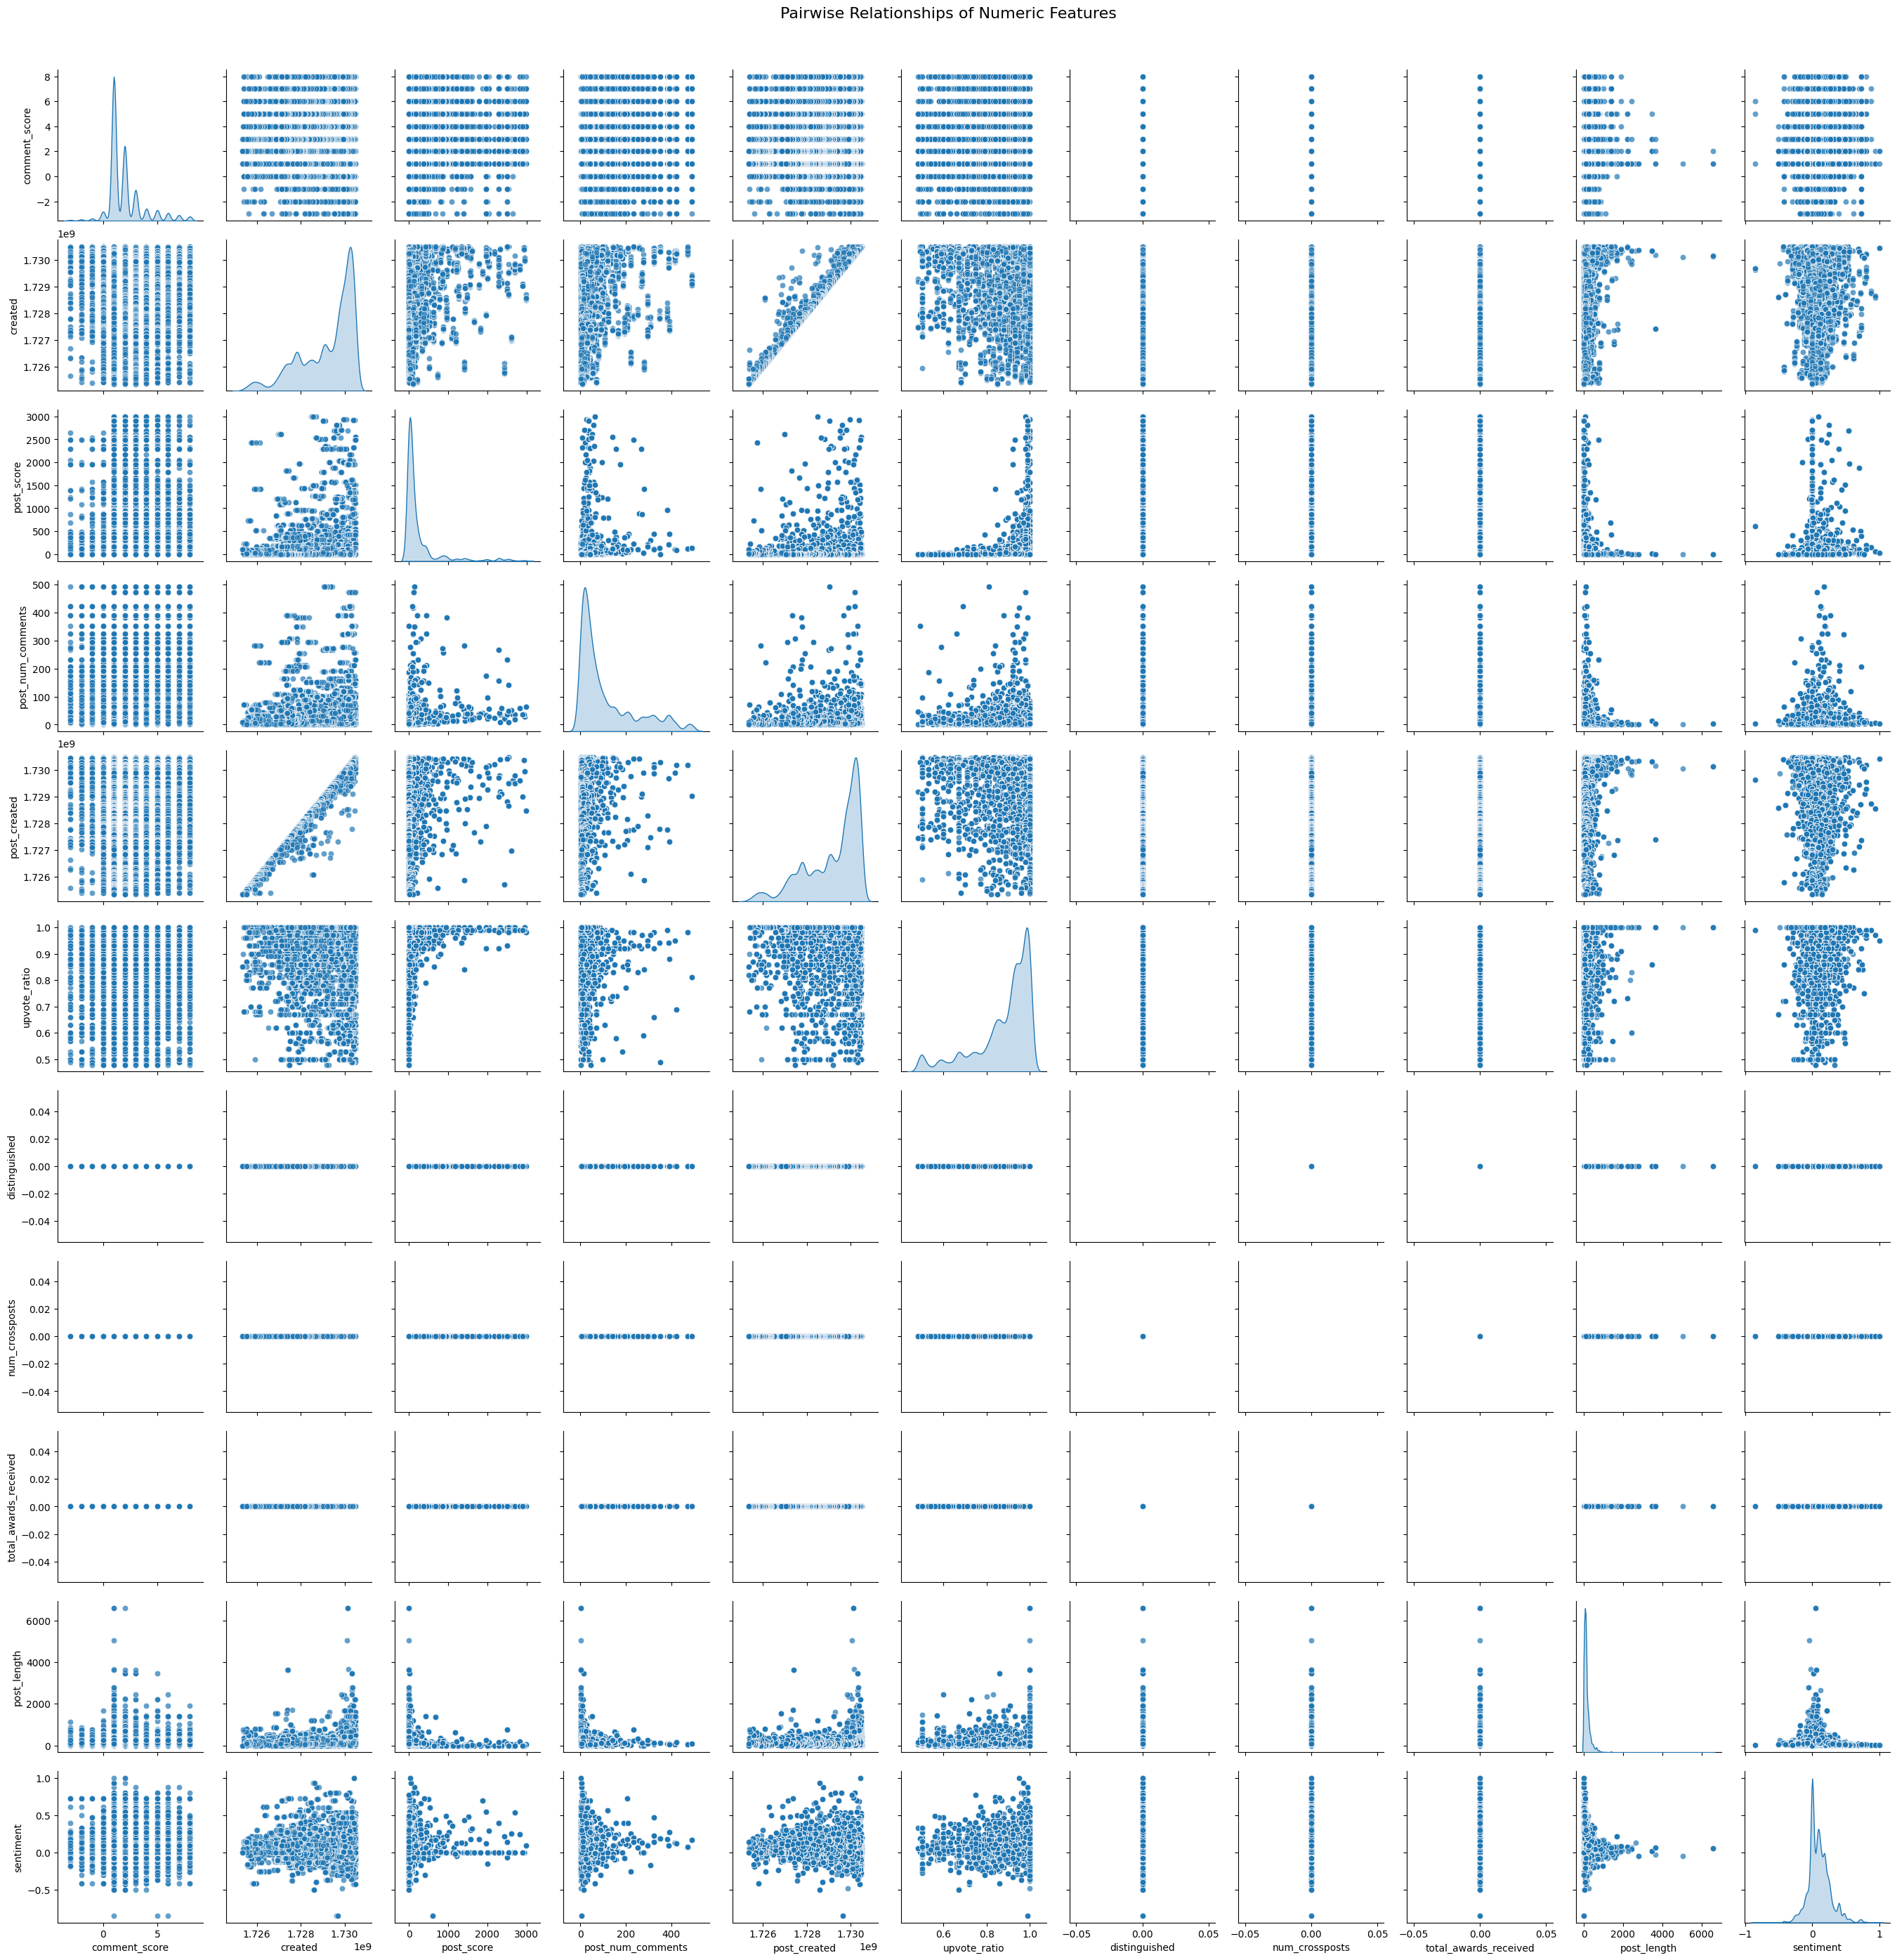

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns from your dataset
numeric_columns = data.select_dtypes(include='number').columns

# Create a pairplot to visualize pairwise relationships
plt.figure(figsize=(12, 10))
sns.pairplot(data[numeric_columns], kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.7})

# Adding title
plt.suptitle('Pairwise Relationships of Numeric Features', y=1.02, fontsize=16)

# Show the plot
plt.show()


Observations:

1. Linear Relationships: Some features show linear relationships, like the strong positive correlation between comment_score and post_score.
2. Clusters and Outliers: Some scatter plots reveal clusters and outliers, indicating potential subgroups or anomalies in the data.
3. Weak Relationships: Many pairs of features show little to no correlation, suggesting they might not be strongly related.
- Overall, the pairplot helps visualize the relationships between features and identify potential patterns or anomalies that might be relevant for further analysis

**DISTRIBUTION OF LABELS ACROSS SUBREDDITS**

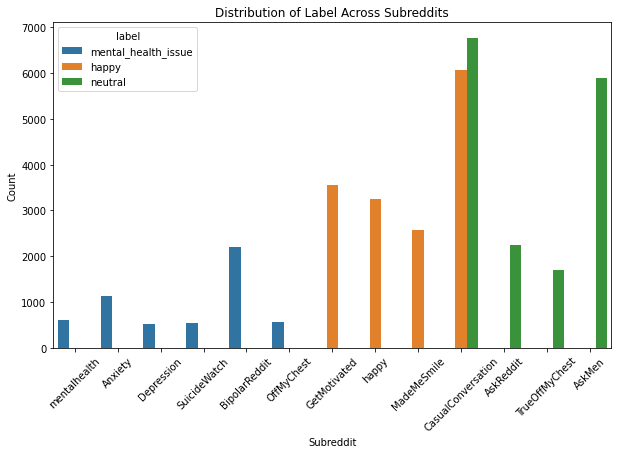

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='subreddit', hue='label')
plt.title('Distribution of Label Across Subreddits')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**WORD CLOUD PER LABEL**

We visualized most common words for happy, neutral and mental_health_issue posts and comments

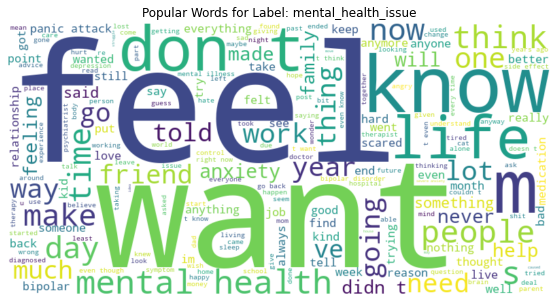

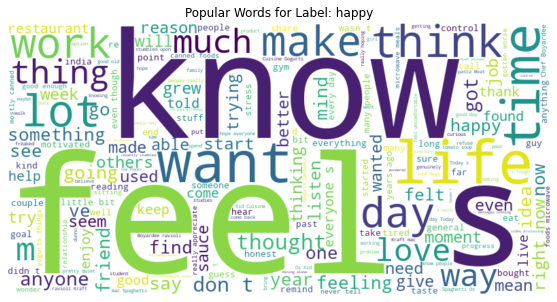

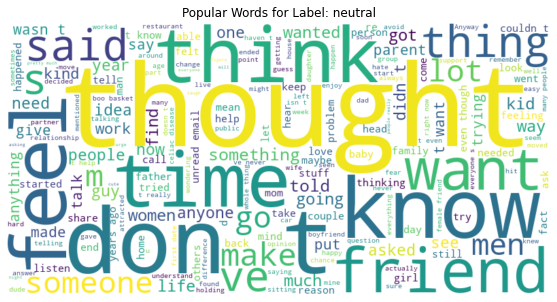

In [33]:

# Function to generate and display a word cloud for each label
def generate_word_clouds_per_label(data, text_column, label_column):
    # Get unique labels
    labels = data[label_column].unique()
    
    # Create a word cloud for each label
    for label in labels:
        # Filter text data for the current label
        text_data = " ".join(data[data[label_column] == label][text_column].astype(str))
        
        # Generate the word cloud without specifying a font path
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
        
        # Display the word cloud
        plt.figure(figsize=(10, 5))
        plt.title(f"Popular Words for Label: {label}")
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()


# Replace 'post_body' with your text column name and 'label' with your label column name
generate_word_clouds_per_label(data, text_column='post_body', label_column='label')

 ## 3. Correlation Matrix

- A correlation matrix is an essential tool to understand the relationship between numeric features in your dataset. It calculates the Pearson correlation coefficient for each pair of features, which ranges from -1 to 1:

- 1 indicates a perfect positive correlation (both features move together in the same direction).
- -1 indicates a perfect negative correlation (one feature moves in the opposite direction of the other).
0 indicates no linear correlation.

By calculating and visualizing the correlation matrix, we can:

1. Identify collinear features: Features that are highly correlated might be redundant and could affect model performance (particularly regression models), leading to multicollinearity.
2. Decide on feature selection: Highly correlated features may need to be dropped or combined to improve the performance of models, especially those that are sensitive to multicollinearity (e.g., linear regression).

Goals of Correlation Matrix:
1. Identify Collinearity:

- If two or more features are highly correlated (correlation coefficient close to 1 or -1), this indicates redundancy between them. These features might not provide additional valuable information, leading to multicollinearity in certain models, like linear regression.
2. Feature Selection:

- Features that are highly correlated (say, greater than 0.8 or less than -0.8) might be candidates for removal or combination:
Drop one of the correlated features: If two features are strongly correlated, you may drop one to avoid redundancy.
Combine the features: If two features are highly correlated and measure similar things, combining them into a single feature (e.g., averaging them) might help improve model performance.
3. Detect Multicollinearity:

- Multicollinearity occurs when two or more independent variables in a model are highly correlated. This can make it difficult to assess the individual effect of each feature on the dependent variable. Detecting and addressing multicollinearity is crucial for models like linear regression, logistic regression, and principal component analysis (PCA).
##  Actionable Insights:
- Highly Correlated Pairs: If you observe a pair of features like post_score and upvote_ratio with a correlation of 0.95, these might be redundant. You could decide to keep only one of these features or combine them.
- Negative Correlations: Features with a strong negative correlation (e.g., created vs. post_created) might suggest an inverse relationship, which could be important for certain models, but it's good to investigate if both are necessary.
- Feature Reduction: If you identify multiple highly correlated features, feature reduction techniques like Principal Component Analysis (PCA) or Variance Inflation Factor (VIF) can be used to create a new set of uncorrelated features.

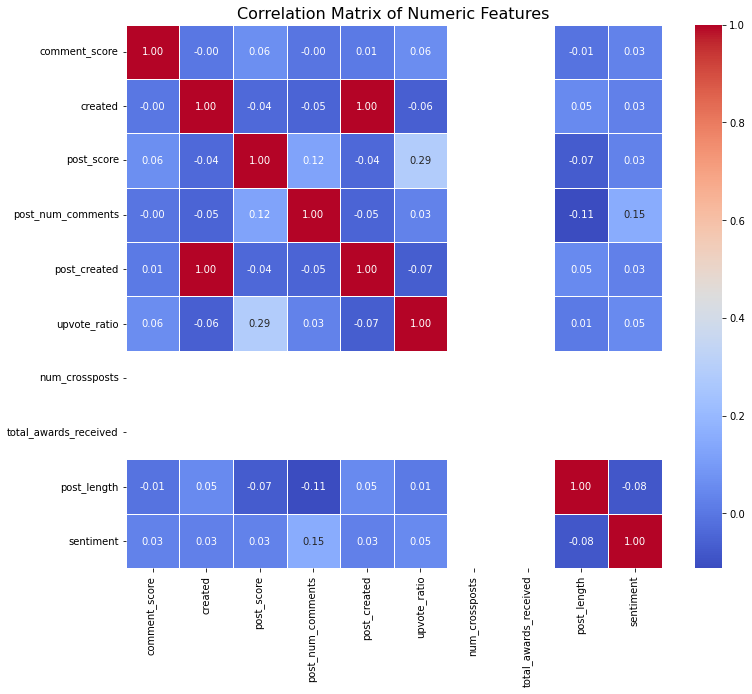

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation matrix
numeric_columns = data.select_dtypes(include='number').columns

# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Add title
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()


Key Observations:

1. Positive Correlations:

- post_score and upvote_ratio have a moderate positive correlation, indicating that higher-scoring posts tend to receive more upvotes.
- post_num_comments and sentiment have a moderate positive correlation, suggesting that posts with more comments often have a more positive sentiment.
2. Negative Correlations:

- post_created and post_length have a weak negative correlation, indicating that older posts might tend to be shorter.
3. Weak or No Correlations:

- Most variables show weak or no correlation with each other, suggesting that they are relatively independent.
Overall, the correlation matrix reveals that while some variables have moderate relationships, most features in the dataset are not strongly correlated. This suggests that these features might provide unique information and could be useful in building predictive models. However, it's important to note that correlation does not imply causation. Further analysis is needed to understand the underlying relationships between these variables.

## 4. 	Distribution Plots: Analyzing the Distribution of Scaled Features

- When working with machine learning models, it’s important to understand the distribution of the features in your dataset. After scaling features (for example, using StandardScaler or MinMaxScaler), we can plot the distribution of each feature to check for the following:

1. Normal Distribution: Many machine learning algorithms (e.g., linear regression, logistic regression) assume that the data follows a normal distribution. If the features are not normally distributed, it might be necessary to transform the data (e.g., using a log transformation or Box-Cox transformation) or use models that do not make this assumption (e.g., tree-based models like Random Forest).
2. Skewed Distribution: Features with skewed distributions can negatively impact the performance of some models. Identifying skewness can help decide whether to apply transformations like log or square root transformations.

C:\Users\hp\AppData\Local\Temp\ipykernel_23180\1601196915.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, color='blue', alpha=0.7)  # KDE plot for smooth distribution
C:\Users\hp\AppData\Local\Temp\ipykernel_23180\1601196915.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, color='blue', alpha=0.7)  # KDE plot for smooth distribution
C:\Users\hp\AppData\Local\Temp\ipykernel_23180\1601196915.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, color='blue', alpha=0.7)  # KDE plot for smooth distribution
C:\Users\hp\AppData\Local\Temp\ipy

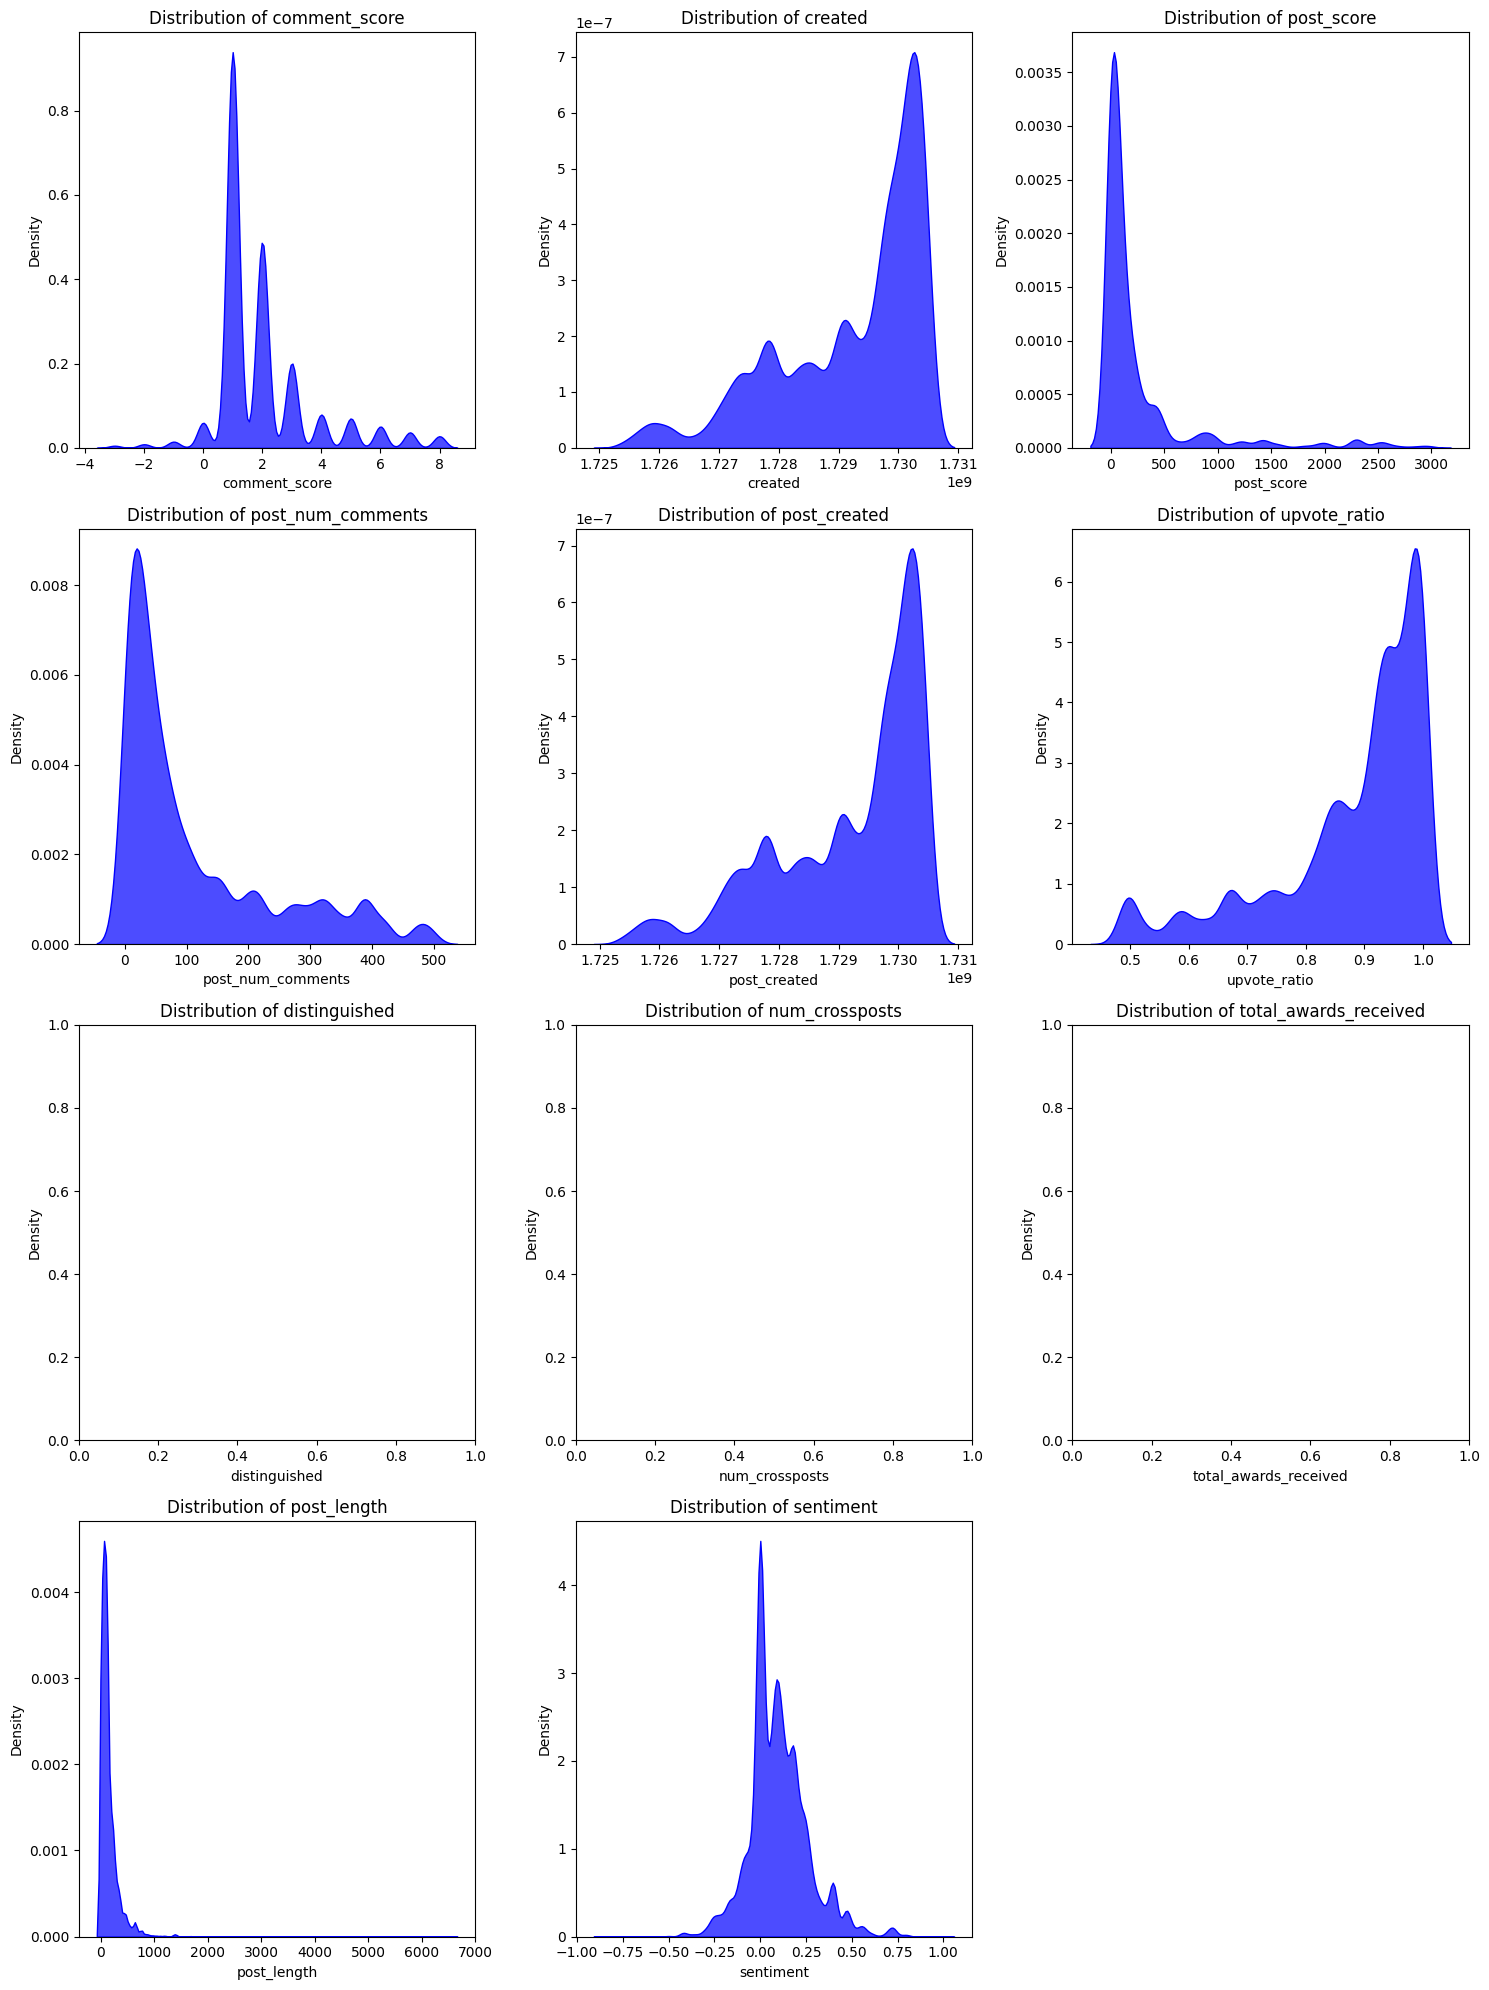

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only the numeric columns (after scaling)
scaled_columns = data.select_dtypes(include='number').columns

# Calculate the number of rows and columns needed for subplots
num_plots = len(scaled_columns)
num_columns = 3  # Choose a fixed number of columns
num_rows = int(np.ceil(num_plots / num_columns))  # Calculate the number of rows

# Plot the distribution of each feature (using KDE or histograms)
plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size based on the number of rows

# Loop through each scaled column and plot its distribution
for i, column in enumerate(scaled_columns, 1):
    plt.subplot(num_rows, num_columns, i)  # Adjust rows and columns dynamically
    sns.kdeplot(data[column], shade=True, color='blue', alpha=0.7)  # KDE plot for smooth distribution
    # Alternatively, use a histogram instead of KDE
    # sns.histplot(data[column], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(f"{column}")
    plt.ylabel("Density")
    
plt.tight_layout()
plt.show()


OBSERVATONS

1. Distribution of comment_score: This plot shows that most comments have a low score, with a few outliers having very high scores.

2. Distribution of created: This plot shows the distribution of the creation time of posts. It appears to be normally distributed with a slight skew to the right.

3. Distribution of post_score: This plot shows that most posts have a low score, with a few outliers having very high scores.

4. Distribution of post_num_comments: This plot shows that most posts have a low number of comments, with a few outliers having a very high number of comments.

5. Distribution of post_created: This plot shows the distribution of the creation time of posts. It appears to be normally distributed with a slight skew to the right.

6. Distribution of upvote_ratio: This plot shows that most posts have a low upvote ratio, with a few outliers having a very high upvote ratio.

7. Distribution of distinguished: This plot shows that most posts are not distinguished.

8. Distribution of num_crossposts: This plot shows that most posts have a low number of crossposts.

9. Distribution of total_awards_received: This plot shows that most posts have a low number of awards received.

10. Distribution of post_length: This plot shows that most posts have a short length.

11. Distribution of sentiment: This plot shows that most posts have a neutral or slightly positive sentiment.

Overall, the plots show that the data is skewed for many features, with a few outliers having very high or low values. This suggests that the data may not be normally distributed and that further analysis is needed to understand the underlying patterns and relationships between the variables.

Explanation of the Code:
1. Selecting Scaled Columns:

- data.select_dtypes(include='number').columns: This selects only the numeric columns from the dataset, which should have been scaled previously. You can adjust this if you are working with a subset of features.
2. Creating Subplots:

- plt.subplot(3, 3, i): Creates subplots in a grid. The 3, 3 indicates that the plot grid will have 3 rows and 3 columns (this can be adjusted depending on the number of features). The i is the index of the feature being plotted.
The number of rows and columns in the subplot grid can be adjusted according to how many features you have.
3. KDE Plot (Kernel Density Estimate):

- sns.kdeplot(): This is used to plot the KDE, which provides a smoothed representation of the distribution of the feature.
shade=True: Adds shading under the curve to highlight the area.
color='blue': The color of the plot.
4. Histogram Alternative:

- Alternatively, you can use sns.histplot(), which will show histograms along with an overlaid KDE. This is useful if you want a clearer view of the actual distribution of data in bins.
5. Tight Layout:

- plt.tight_layout(): Ensures that the subplots do not overlap with each other and that they fit within the figure window neatly.
6. Displaying the Plot:

- plt.show(): Displays the plot on the screen.

## 5. Target Variable Analysis: Goals and Complete Code

In machine learning tasks, analyzing the target variable is a crucial step, particularly when preparing data for a classification model. The following steps can guide you in conducting a target variable analysis:

Goals:
1. Distribution of Label Variable: Check the distribution of the target variable to understand if there is any class imbalance. Class imbalance can lead to bias in your model and may require techniques like resampling (e.g., oversampling the minority class or undersampling the majority class).
2. Target vs. Input Feature Relationships: Analyze how the target variable relates to the input features. This can give insight into the predictive power of different features and help identify relationships or patterns that are useful for the model.
3. Boxplots or Violin Plots: For continuous Labels, you can plot boxplots or violin plots to understand how the target variable is distributed across different feature categories.
4. Class Balance: In classification problems, class balance (or imbalance) should be evaluated to prevent skewed predictions. For regression problems, evaluate the distribution of the target variable.

In [ ]:
data.columns


Index(['title', 'post_body', 'comment_body', 'comment_score', 'post_url',
       'created', 'subreddit', 'label', 'post_score', 'post_num_comments',
       'author', 'comment_author', 'post_created', 'post_flair',
       'upvote_ratio', 'over_18', 'is_self_post', 'author_premium',
       'distinguished', 'all_awardings', 'num_crossposts',
       'total_awards_received', 'post_thumbnail', 'link_flair_text', 'post_id',
       'comment_id', 'author_flair_text', 'post_length', 'sentiment'],
      dtype='object')

C:\Users\hp\AppData\Local\Temp\ipykernel_23180\573759735.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_column, data=data, palette='Set2')


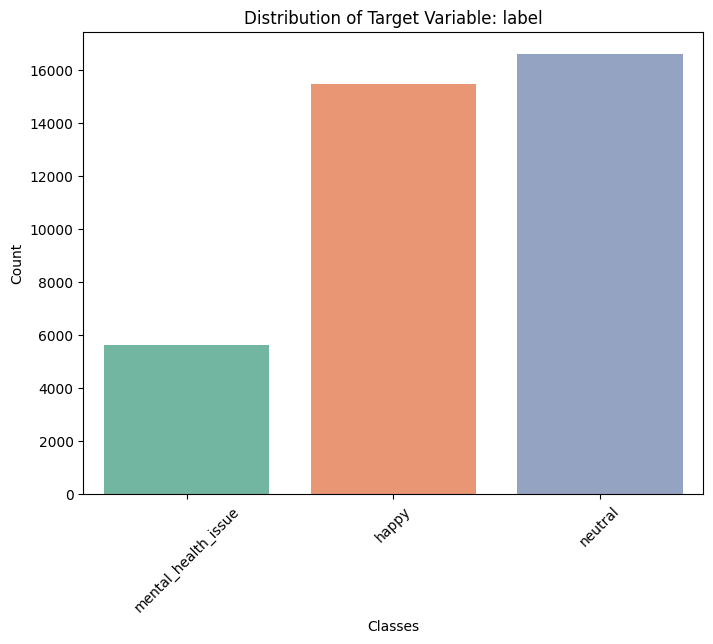

Class Distribution:
label
neutral                16591
happy                  15461
mental_health_issue     5626
Name: count, dtype: int64
Class Imbalance Ratio: 0.34


C:\Users\hp\AppData\Local\Temp\ipykernel_23180\573759735.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target_column, y=column, palette='Set2')


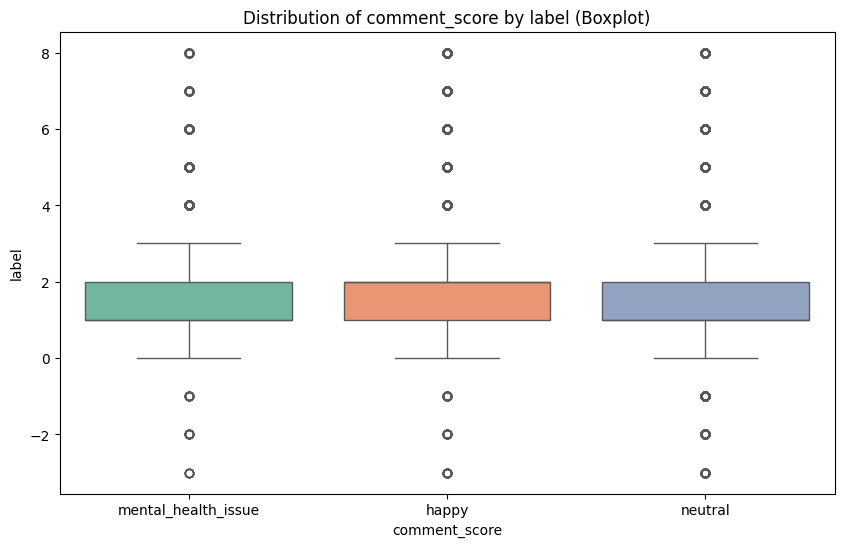

C:\Users\hp\AppData\Local\Temp\ipykernel_23180\573759735.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target_column, y=column, palette='Set2')


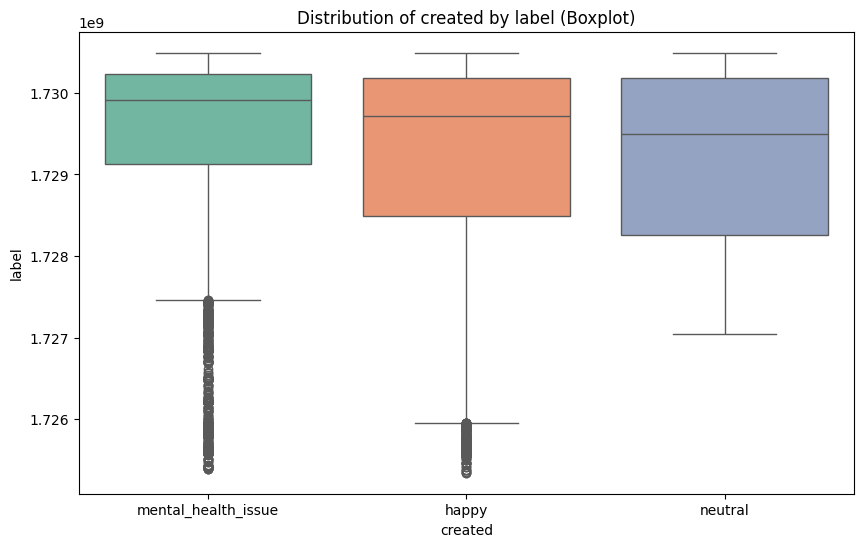

C:\Users\hp\AppData\Local\Temp\ipykernel_23180\573759735.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target_column, y=column, palette='Set2')


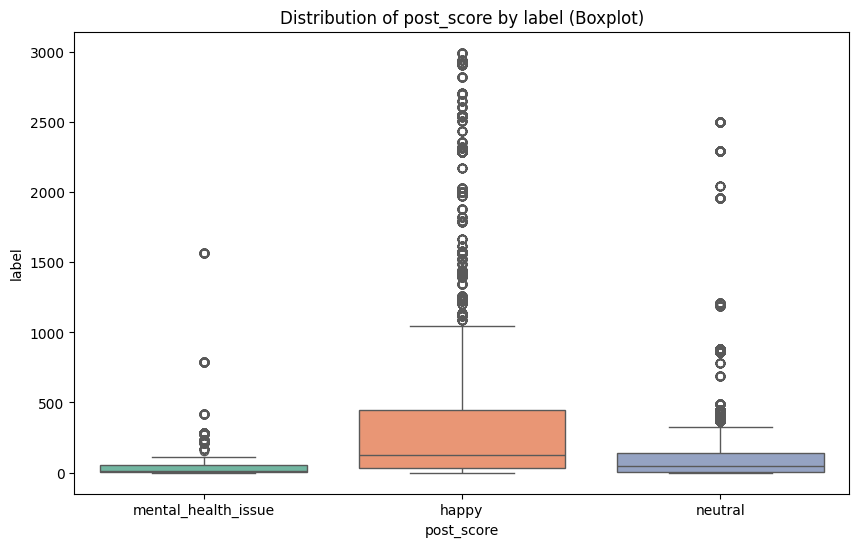

C:\Users\hp\AppData\Local\Temp\ipykernel_23180\573759735.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target_column, y=column, palette='Set2')


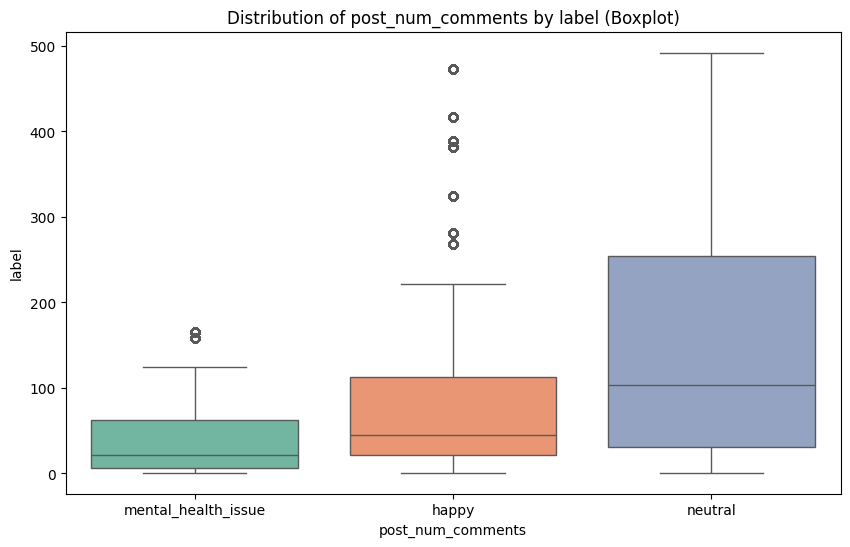

C:\Users\hp\AppData\Local\Temp\ipykernel_23180\573759735.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target_column, y=column, palette='Set2')


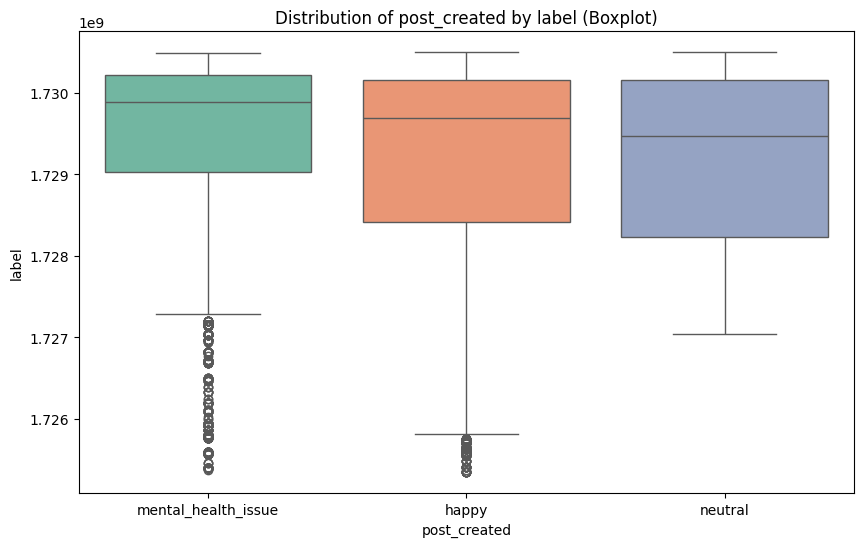

C:\Users\hp\AppData\Local\Temp\ipykernel_23180\573759735.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target_column, y=column, palette='Set2')


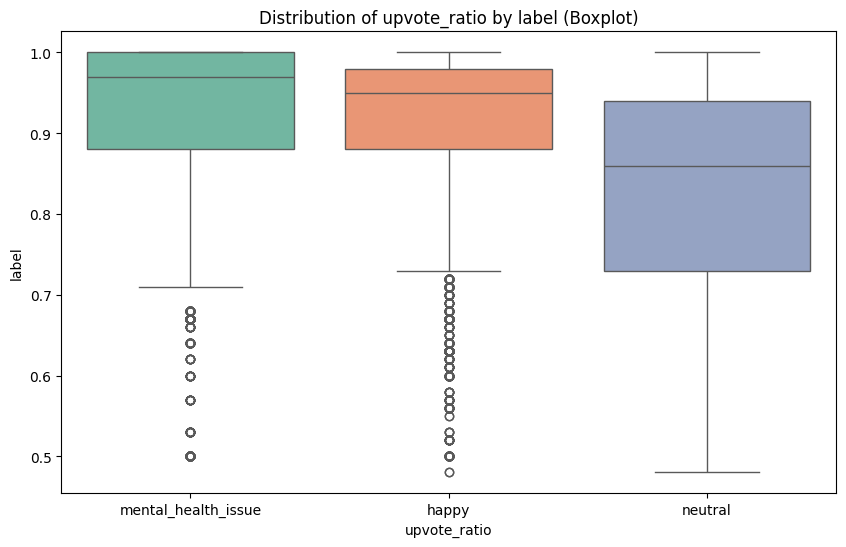

C:\Users\hp\AppData\Local\Temp\ipykernel_23180\573759735.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target_column, y=column, palette='Set2')


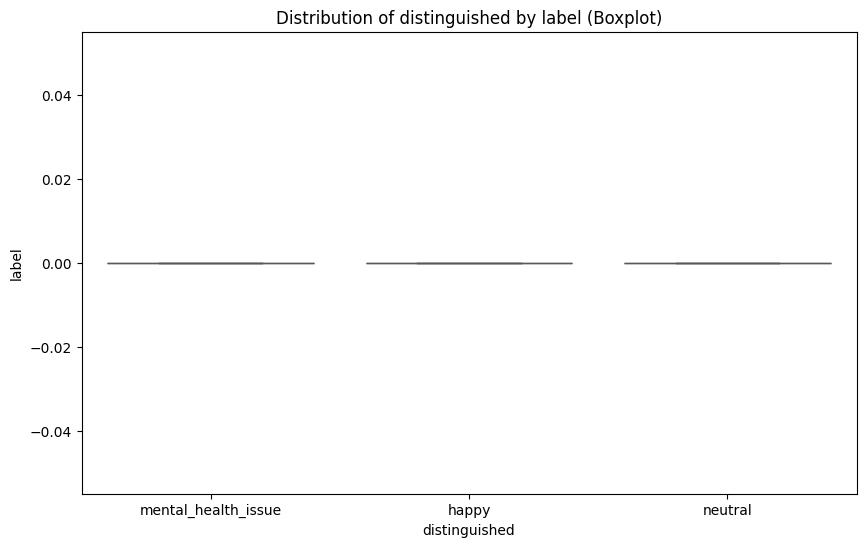

C:\Users\hp\AppData\Local\Temp\ipykernel_23180\573759735.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target_column, y=column, palette='Set2')


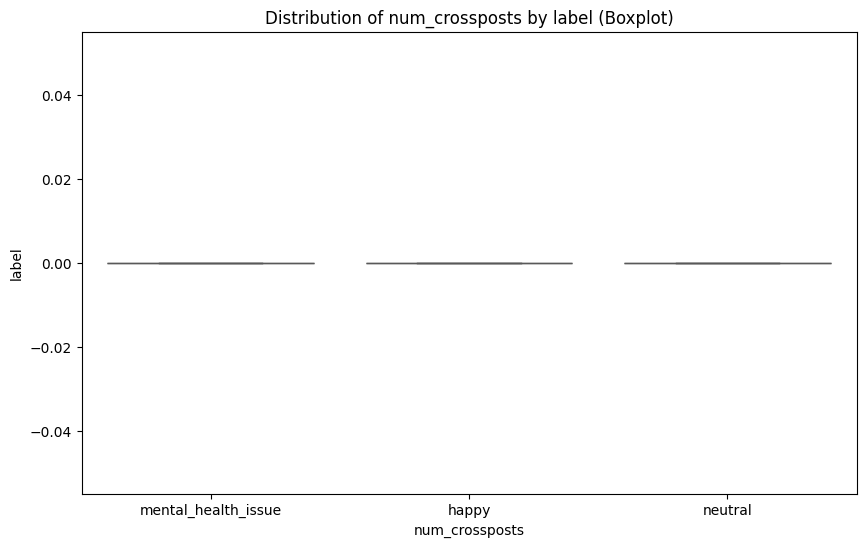

C:\Users\hp\AppData\Local\Temp\ipykernel_23180\573759735.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target_column, y=column, palette='Set2')


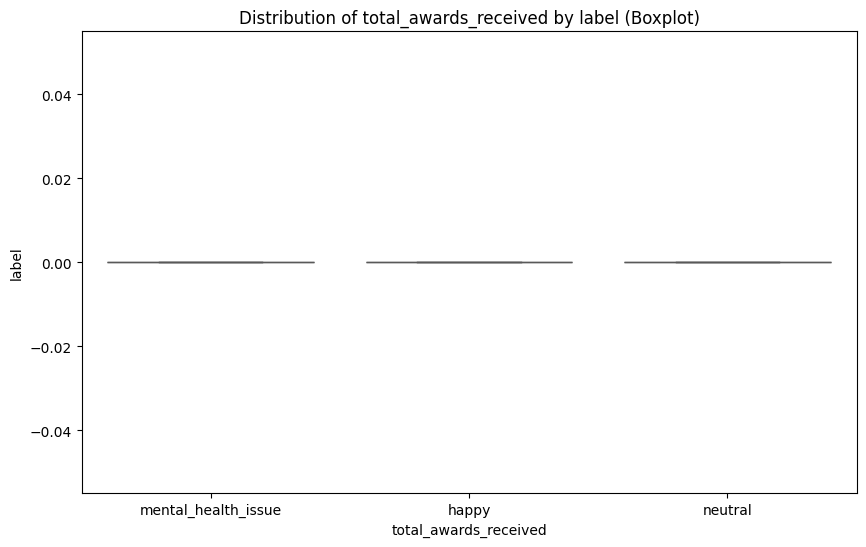

C:\Users\hp\AppData\Local\Temp\ipykernel_23180\573759735.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target_column, y=column, palette='Set2')


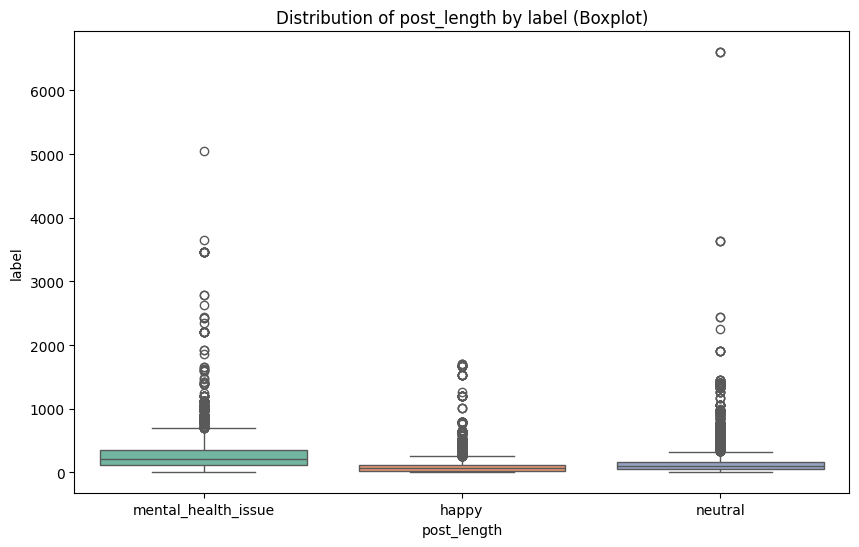

C:\Users\hp\AppData\Local\Temp\ipykernel_23180\573759735.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target_column, y=column, palette='Set2')


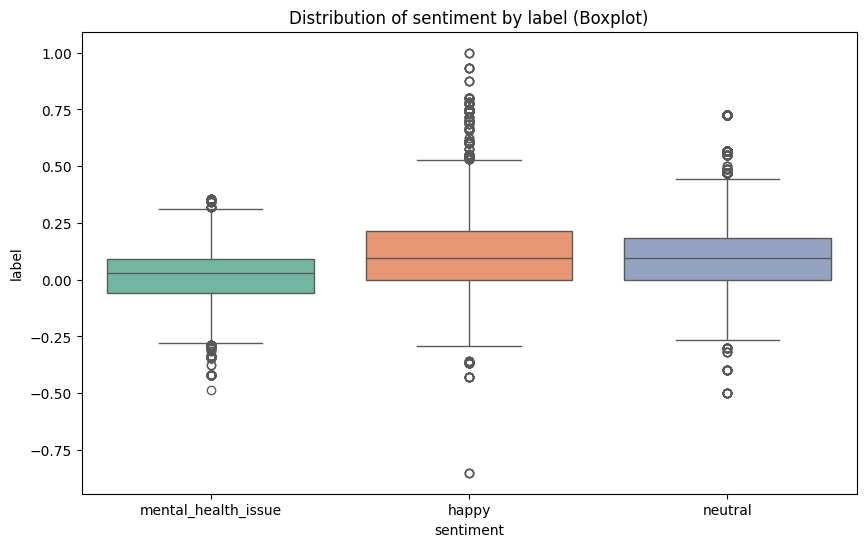

Class Imbalance Detected. Consider resampling techniques.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume the target variable column is 'label'
target_column = 'label'

# 1. Distribution of the Target Variable (For Classification)
# For Classification Task: Check the distribution of classes
if data[target_column].dtype == 'object' or len(data[target_column].unique()) < 20:  # Categorical target
    plt.figure(figsize=(8, 6))
    sns.countplot(x=target_column, data=data, palette='Set2')
    plt.title(f"Distribution of Target Variable: {target_column}")
    plt.xlabel("Classes")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

    # Additional: Check for Class Imbalance
    class_counts = data[target_column].value_counts()
    print("Class Distribution:")
    print(class_counts)
    imbalance_ratio = class_counts.min() / class_counts.max()
    print(f"Class Imbalance Ratio: {imbalance_ratio:.2f}")

# 2. Target vs. Input Feature Relationships (for both classification and regression tasks)
# For categorical target variable, let's see how the target relates to numeric features.
numeric_columns = data.select_dtypes(include='number').columns

# We don't need the target column ('label') in this list of numeric columns, so exclude it
numeric_columns = numeric_columns[numeric_columns != target_column]

# Scatterplots or Boxplots/Violin plots for relationships
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    if data[target_column].dtype == 'object' or len(data[target_column].unique()) < 20:
        sns.boxplot(data=data, x=target_column, y=column, palette='Set2')
        plt.title(f"Distribution of {column} by {target_column} (Boxplot)")
    else:
        sns.scatterplot(data=data, x=column, y=target_column, color='orange')
        plt.title(f"Target vs {column} (Scatterplot)")

    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()

# 3. Additional Analysis: If Class Imbalance is detected, consider resampling or stratified sampling
# If imbalance ratio is too high, resampling techniques may be necessary (e.g., SMOTE or undersampling the majority class).
if imbalance_ratio < 0.5:
    print("Class Imbalance Detected. Consider resampling techniques.")


- With the  message "Class Imbalance Detected.We will  Consider resampling techniques." appears, it indicates that the target variable has a significant imbalance between the different classes. This imbalance can negatively affect model performance, especially in classification tasks, where the model might be biased toward predicting the majority class.

#### Resampling Techniques to Address Class Imbalance:
Here are two common approaches to handle class imbalance:

1. Oversampling: Increase the number of samples in the minority class. The most popular method is SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic samples based on the existing minority class samples.

2. Undersampling: Reduce the number of samples in the majority class to match the minority class.

#### Using SMOTE for Oversampling:
SMOTE is a technique that generates synthetic samples by interpolating between existing minority class samples. You can use the imblearn library to apply SMOTE.

WE WILL HANDLE THE SMOTE FOR OVERSAMPLING IN THE 

**4.0 DATA PREPROCESSING**

To prepare the text data for modeling, WEtake the following steps:

Converts text to lowercase.

Removes mentions (e.g., @username).

Removes non-alphabetic characters and symbols.

Splits text into words (tokenization).

Removes stop words.

Applies stemming to reduce words to their root form.

## 1. Text Preprocessing

- Before any machine learning, the raw text data (e.g., post body, comment body) needs to be preprocessed to make it suitable for model consumption.

Text Preprocessing Steps:
1. Tokenization: Breaking down text into words or sentences.
2. Stopword Removal: Removing words like "the", "and", etc., that don't carry much meaning in classification tasks.
3. Stemming/Lemmatization: Reducing words to their root form

In [36]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split

# Download NLTK data if you haven't already
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    # Remove non-alphabetical characters
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I)
    
    # Convert to lowercase
    text = text.lower()

    # Tokenize text
    tokens = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Apply preprocessing
data['cleaned_post_body'] = data['post_body'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/admin/nltk_data...


Why Preprocess Text?: Raw text is noisy, and without processing, the machine learning model won't be able to understand it well. Tokenization, stopword removal, and stemming/lemmatization help reduce the dimensionality and focus on important words.

## 2. Feature Extraction

Now that the text data is preprocessed, we need to convert it into a numerical format so that the machine learning models can understand it.

Feature Extraction Techniques:
1. TF-IDF: Captures the importance of words in relation to the entire corpus.
2. Word Embeddings (Word2Vec, GloVe, or BERT): Provides a dense vector representation of words, preserving their semantic meaning.
3. Sentiment Analysis: Extract sentiment scores or emotional tones from text (very important for mental health-related posts).

1. TextBlob (Simpler Sentiment Analysis)

TextBlob is a very easy-to-use library for text processing that provides basic sentiment analysis based on polarity and subjectivity.

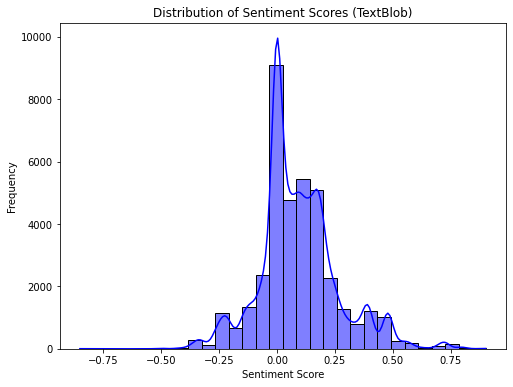

In [37]:
from textblob import TextBlob

# Apply TextBlob sentiment analysis
data['sentiment'] = data['cleaned_post_body'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualizing Sentiment Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data['sentiment'], bins=30, kde=True, color='blue')
plt.title("Distribution of Sentiment Scores (TextBlob)")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


- TextBlob returns a sentiment polarity score ranging from -1 (negative) to 1 (positive), which can be directly used in your analysis.
- Why Use TextBlob?: It is simple and easy to use for basic sentiment analysis. It also provides subjectivity scores that may be useful in your analysis.

2. Transformers (BERT-based models)

We need more advanced and context-aware sentiment analysis, So we will use transformer-based models, such as BERT (Bidirectional Encoder Representations from Transformers) or fine-tuned models from Hugging Face’s transformers library.

DistilBERT, has a maximum token length of 512 tokens, but your input text is longer than that (543 tokens in your case). This is a common issue with transformer-based models, which have input size limitations.

Why Use BERT or Transformer models?: These models have state-of-the-art performance for sentiment analysis. They capture deeper contextual relationships in text, making them much better at understanding nuances, sarcasm, and emotion in language, especially in complex text such as online conversations.

In [39]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

# Assuming 'data' is your DataFrame and it has a 'post_body' column with the text you want to analyze

# Load pre-trained BERT model and tokenizer from Hugging Face
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Use the pipeline for sentiment analysis
sentiment_analyzer = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# Define a function to handle text preprocessing (tokenization, truncation, etc.)
def safe_sentiment_analysis(text):
    # Tokenize the text with truncation and padding for sequences longer than 512 tokens
    inputs = tokenizer(str(text), truncation=True, padding=True, max_length=512, return_tensors="pt")
    
    # Use the model to predict sentiment
    outputs = model(**inputs)
    
    # Get the predicted sentiment label (you can also return scores if needed)
    sentiment_label = torch.argmax(outputs.logits, dim=1).item()
    return sentiment_label

# Apply sentiment analysis to each post in the DataFrame
data['sentiment'] = data['post_body'].apply(lambda x: safe_sentiment_analysis(x))

# Check the output
print(data[['post_body', 'sentiment']].head())

# Optional: Visualize the sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot of sentiment labels
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=data, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.show()

# Additional: Sentiment vs Post Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='post_score', data=data, palette='Set2')
plt.title('Sentiment vs Post Score')
plt.xlabel('Sentiment Label')
plt.ylabel('Post Score')
plt.show()


KeyboardInterrupt: 

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


                                           post_body  sentiment
0  I'm finding it really hard to keep myself toge...          1
1  Please tell me if I sound entitled or selfish....          1
2  Does anyone else ever get like this? Or have a...          1
3  Does anyone else ever get like this? Or have a...          1
4  I feel in over my head and I’m not sure what t...          1


<ipython-input-43-aa5f93ca92d1>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='Set2')


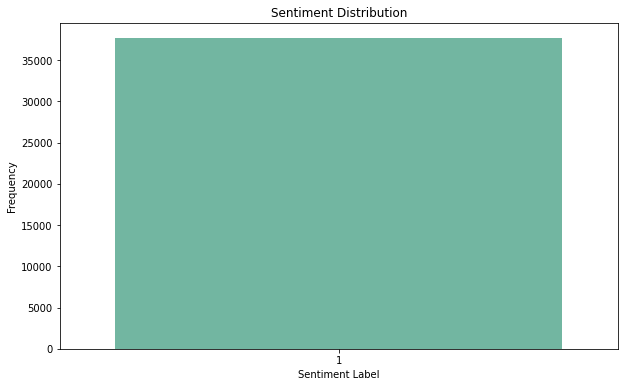

In [43]:
import pandas as pd
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from joblib import Parallel, delayed

# Load lightweight model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Use CPU (Metal MPS not fully compatible)
device = torch.device("cpu")  # Always use CPU for now to avoid issues with MPS
model.to(device)

# Define batch processing function
def batch_sentiment_analysis(texts, batch_size=64):
    sentiments = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        
        # Tokenize with truncation and padding
        inputs = tokenizer(batch, truncation=True, padding=True, max_length=256, return_tensors="pt")
        inputs = {key: val.to(device) for key, val in inputs.items()}
        
        # Perform prediction
        with torch.no_grad():
            outputs = model(**inputs)
        
        # Get sentiment labels
        batch_sentiments = torch.argmax(outputs.logits, dim=1).cpu().numpy().tolist()
        sentiments.extend(batch_sentiments)
    return sentiments

# Parallel processing function
def parallel_sentiment_analysis(texts, n_jobs=4, batch_size=64):
    chunks = [texts[i:i + batch_size * n_jobs] for i in range(0, len(texts), batch_size * n_jobs)]
    results = Parallel(n_jobs=n_jobs)(
        delayed(batch_sentiment_analysis)(chunk, batch_size=batch_size) for chunk in chunks
    )
    return [sentiment for batch in results for sentiment in batch]

# Load data (Replace with your own data loading method)
# Example: data = pd.read_csv('your_dataset.csv')
texts = data['post_body'].astype(str).tolist()

# Perform sentiment analysis in parallel
data['sentiment'] = parallel_sentiment_analysis(texts, n_jobs=4, batch_size=128)

# Check results
print(data[['post_body', 'sentiment']].head())

# Visualize sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=data, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.show()


After running the BERT-based sentiment analysis and chunking code, you have generated an additional column (sentiment) with the extracted sentiment label for each text. To ensure WE know which features are available for modeling, you need to:

1. Review the columns currently available in the dataset.
2. Check the TF-IDF or other extracted features that you might have added.
3. Prepare a final feature set, including only the columns needed for modeling.

Fine-Tuning DistilBERT for Sequence Classification:

In [48]:
import os
os.environ["TQDM_DISABLE"] = "True"


In [67]:
from datasets import load_dataset

# Load the dataset and disable tqdm progress bar
dataset = load_dataset('imdb', disable_tqdm=True)


ValueError: BuilderConfig ParquetConfig(name='plain_text', version=0.0.0, data_dir=None, data_files={'train': ['plain_text/train-*'], 'test': ['plain_text/test-*'], 'unsupervised': ['plain_text/unsupervised-*']}, description=None, batch_size=None, columns=None, features=None) doesn't have a 'disable_tqdm' key.

In [62]:
import os
from datasets import load_dataset
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
import joblib

# Disable tqdm globally by setting environment variable
os.environ["TQDM_DISABLE"] = "true"  # Disable progress bar to avoid TqdmKeyError

# Load the IMDb dataset
dataset = load_dataset('imdb')

# Load the pre-trained DistilBERT model and tokenizer
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

# Tokenize the datasets
tokenized_datasets = dataset.map(tokenize_function, batched=True, num_proc=1)  # `num_proc=1` to speed up tokenization

# Set up the training arguments
training_args = TrainingArguments(
    output_dir='./results',               # output directory
    num_train_epochs=1,                   # Reduce epochs to 1 to minimize time
    per_device_train_batch_size=8,        # Smaller batch size to speed up
    per_device_eval_batch_size=8,         # Smaller batch size for eval to speed up
    warmup_steps=200,                     # Reduced warmup steps
    weight_decay=0.01,                    # Regularization to avoid overfitting
    logging_dir='./logs',                 # directory for storing logs
    logging_steps=10,                     # frequency of logging
    evaluation_strategy="epoch",          # evaluate after each epoch
    disable_tqdm=True,                    # Disable tqdm progress bar
    load_best_model_at_end=True           # Load the best model at the end of training
)

# Set up Trainer with minimal arguments to avoid long training times
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],   # training dataset
    eval_dataset=tokenized_datasets['test'],     # evaluation dataset
)

# Start training and fine-tuning the model
trainer.train()

# Save the fine-tuned model and tokenizer as .pkl files
joblib.dump(model, 'sentiment_model.pkl')  # Save model as .pkl file
joblib.dump(tokenizer, 'sentiment_tokenizer.pkl')  # Save tokenizer as .pkl file

# Save the model and tokenizer for later use (transformers format)
model.save_pretrained('./sentiment_model')
tokenizer.save_pretrained('./sentiment_model')

# Done: model is ready for inference and deployment


TqdmKeyError: "Unknown argument(s): {'delay': 5}"

Using the Fine-Tuned Model for Inference

In [ ]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer

# Load the fine-tuned model and tokenizer
model = DistilBertForSequenceClassification.from_pretrained("./sentiment_model")
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize your input text
inputs = tokenizer("Your example text here", return_tensors="pt")

# Make predictions
outputs = model(**inputs)
logits = outputs.logits
predicted_class = torch.argmax(logits, dim=-1)

print(f"Predicted sentiment class: {predicted_class.item()}")


In [69]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense
from tensorflow.keras.models import Sequential

# Load the IMDb dataset using the HuggingFace datasets library
from datasets import load_dataset

# Load dataset
dataset = load_dataset('imdb')

# Combine train and test dataset
train_data = dataset['train']
test_data = dataset['test']

# Prepare text and labels for training
X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

# Label encoding for categorical targets (0, 1)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# TF-IDF Vectorization for Random Forest and Logistic Regression
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform training data, transform test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model 1: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train_encoded)

# Predict and evaluate Random Forest
rf_predictions = rf_model.predict(X_test_tfidf)
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test_encoded, rf_predictions))
print(classification_report(y_test_encoded, rf_predictions))

# Save Random Forest model for deployment
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
    
# Model 2: Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_tfidf, y_train_encoded)

# Predict and evaluate Logistic Regression
log_reg_predictions = log_reg_model.predict(X_test_tfidf)
print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test_encoded, log_reg_predictions))
print(classification_report(y_test_encoded, log_reg_predictions))

# Save Logistic Regression model for deployment
with open('log_reg_model.pkl', 'wb') as f:
    pickle.dump(log_reg_model, f)

# Model 3: LSTM / GRU Model

# Prepare the text data for LSTM/GRU (sequence padding)
# Use the tokenizer to convert text to sequences
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=256)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=256)

# Create LSTM/GRU Model
def create_lstm_gru_model():
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=256))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Initialize and train the LSTM/GRU model
lstm_gru_model = create_lstm_gru_model()
lstm_gru_model.fit(X_train_pad, y_train_encoded, epochs=3, batch_size=64, validation_data=(X_test_pad, y_test_encoded))

# Predict and evaluate LSTM/GRU
lstm_gru_predictions = (lstm_gru_model.predict(X_test_pad) > 0.5).astype("int32")
print("\nLSTM/GRU Performance:")
print("Accuracy:", accuracy_score(y_test_encoded, lstm_gru_predictions))
print(classification_report(y_test_encoded, lstm_gru_predictions))

# Save LSTM/GRU model for deployment
lstm_gru_model.save('lstm_gru_model.h5')

# Performance summary
print("\nPerformance Summary:")
print("Random Forest Accuracy:", accuracy_score(y_test_encoded, rf_predictions))
print("Logistic Regression Accuracy:", accuracy_score(y_test_encoded, log_reg_predictions))
print("LSTM/GRU Accuracy:", accuracy_score(y_test_encoded, lstm_gru_predictions))


TypeError: bases must be types

1. Random Forest Classifier

In [71]:
# random_forest_model.py

import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from datasets import load_dataset

# Load the IMDb dataset
dataset = load_dataset('imdb')

# Prepare train and test datasets
train_data = dataset['train']
test_data = dataset['test']

X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']

# Label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train_encoded)

# Predict and evaluate
rf_predictions = rf_model.predict(X_test_tfidf)
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test_encoded, rf_predictions))
print(classification_report(y_test_encoded, rf_predictions))

# Save the model for deployment
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# You can download the model using 'rf_model.pkl'


TqdmKeyError: "Unknown argument(s): {'delay': 5}"